# Data Understanding

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from random import sample
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### Initialization and Functions

In [ ]:
QDV22 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022.txt',sep=',')
QDV22.drop(['CODICE NUTS 3 2021', 'CODICE PROVINCIA ISTAT (STORICO)','DENOMINAZIONE CORRENTE','RIFERIMENTO TEMPORALE','FONTE ORIGINALE'], axis=1, inplace=True)
QDV22 = QDV22.rename(columns={'NOME PROVINCIA (ISTAT)': 'Province', 'VALORE': 'Value','INDICATORE':'Indicator',"UNITA' DI MISURA":'u'})

In [ ]:
QDV21 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021.txt',sep=',')
QDV21.drop(['CODICE NUTS 3 2021', 'CODICE PROVINCIA ISTAT (STORICO)','DENOMINAZIONE CORRENTE','RIFERIMENTO TEMPORALE','FONTE ORIGINALE'], axis=1, inplace=True)
QDV21 = QDV21.rename(columns={'NOME PROVINCIA (ISTAT)': 'Province', 'VALORE': 'Value','INDICATORE':'Indicator',"UNITA' DI MISURA":'u'})

In [ ]:
QDV20 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020.txt',sep=',')
QDV20.drop(['CODICE NUTS 3 2021', 'CODICE PROVINCIA ISTAT (STORICO)','DENOMINAZIONE CORRENTE','RIFERIMENTO TEMPORALE','FONTE ORIGINALE'], axis=1, inplace=True)
QDV20 = QDV20.rename(columns={'NOME PROVINCIA (ISTAT)': 'Province', 'VALORE': 'Value','INDICATORE':'Indicator',"UNITA' DI MISURA":'u'})

In [ ]:
def corr_matrix(data):
    corr_matrix = data.corr()
    
    for var in corr_matrix.columns:
        corr_matrix[var] = corr_matrix[var].apply(lambda x:x if abs(x) > 0.50 and abs(x) < 1 else '')
    
    return corr_matrix

In [ ]:
def makeboxplot(QDV,list_attribute,name):
  fig = plt.figure(figsize=(18,20))
  a = fig.add_subplot(5,3,1)
  b = fig.add_subplot(5,3,2)
  c = fig.add_subplot(5,3,3)
  d = fig.add_subplot(5,3,4)
  e = fig.add_subplot(5,3,5)
  f = fig.add_subplot(5,3,6)
  g = fig.add_subplot(5,3,7)
  h = fig.add_subplot(5,3,8)
  i = fig.add_subplot(5,3,9)
  l = fig.add_subplot(5,3,10)
  m = fig.add_subplot(5,3,11)
  n = fig.add_subplot(5,3,12)
  o = fig.add_subplot(5,3,13)
  p = fig.add_subplot(5,3,14)
  q = fig.add_subplot(5,3,15)


  QDV[list_attribute[0]].plot(kind='box', fontsize=12, ax=a)
  a.grid(True)

  QDV[list_attribute[1]].plot(kind='box', fontsize=12, ax=b)
  b.grid(True)

  QDV[list_attribute[2]].plot(kind='box', fontsize=12, ax=c)
  c.grid(True)

  QDV[list_attribute[3]].plot(kind='box', fontsize=12, ax=d)
  d.grid(True)

  QDV[list_attribute[4]].plot(kind='box', fontsize=12, ax=e)
  e.grid(True)

  QDV[list_attribute[5]].plot(kind='box', fontsize=12, ax=f)
  f.grid(True)

  QDV[list_attribute[6]].plot(kind='box', fontsize=12, ax=g)
  g.grid(True)

  QDV[list_attribute[7]].plot(kind='box', fontsize=12, ax=h)
  h.grid(True)

  QDV[list_attribute[8]].plot(kind='box', fontsize=12, ax=i)
  i.grid(True)

  QDV[list_attribute[9]].plot(kind='box', fontsize=12, ax=l)
  l.grid(True)

  QDV[list_attribute[10]].plot(kind='box', fontsize=12, ax=m)
  m.grid(True)

  QDV[list_attribute[11]].plot(kind='box', fontsize=12, ax=n)
  n.grid(True)

  QDV[list_attribute[12]].plot(kind='box', fontsize=12, ax=o)
  o.grid(True)

  QDV[list_attribute[13]].plot(kind='box', fontsize=12, ax=p)
  p.grid(True)

  QDV[list_attribute[14]].plot(kind='box', fontsize=12, ax=q)
  q.grid(True)

  title = name + ' - Boxplot Analysis'

  fig.suptitle(title, fontsize=16)
  plt.tight_layout(pad=6)
  plt.show()

### List of Indicator per Group

In [ ]:
# Business and Work

BusinessAndWork22 = ['Startup innovative ',
                   'Imprese che fanno ecommerce',
                   'Imprenditorialità giovanile',
                   'Giovani che non lavorano e non studiano (Neet)',
                   'Tasso di occupazione ',
                   'Numero di ore cig autorizzate ',
                   'Quota di export sul Pil',
                   'Nuove iscrizioni',
                   'Cessazioni ',
                   'Imprese straniere ',
                   'Qualità ricettiva delle strutture alberghiere ',
                   'Densità di posti letto nelle strutture ricettive ',
                   'Infortuni sul lavoro',
                   'Numero pensioni di vecchiaia',
                   'Partecipazione alla formazione continua' ]

BusinessAndWork21 = ['Imprese cessate',
                     'Formazione continua',
                     'Posti letto nelle strutture ricettive ',
                     'Giovani Neet',
                     'Home e corporate banking', 
                     'Imprenditorialità giovanile', 
                     'Imprese che fanno ecommerce', 
                     'Imprese straniere ', 
                     'Numero di ore Cig autorizzate ',
                     'Nuove imprese iscritte',
                     'Qualità delle strutture ricettive  ',
                     'Quota di export sul Pil',
                     'Start up innovative ',
                     'Infortuni sul lavoro',
                     'Tasso di occupazione ']

BusinessAndWork20 = ['Diffusione del reddito di cittadinanza',
                     'Imprese in fallimento',
                     'Imprese che fanno ecommerce',
                     'Imprenditorialità giovanile',
                     'Imprese femminili',
                     'Imprese straniere',
                     'Startup innovative',
                     'Imprese in rete',
                     'Tasso di occupazione',
                     'Gap occupazionale tra maschi e femmine',
                     'Quota di export sul Pil',
                     'Banda larga',
                     'Cig ordinaria autorizzata',
                     'Nuove iscrizioni di imprese',
                     'Cessazioni di imprese']



# Demography and Society

DemographyAndSociety22 = ['Medici specialisti',
                        'Persone con almeno il diploma',
                        'Laureati e altri titoli terziari',
                        'Indice di dipendenza strutturale',
                        'Speranza di vita alla nascita ',
                        'Numero medio di anni di studio della popolazione',
                        'Saldo migratorio totale',
                        'Medici di medicina generale',
                        'Quoziente di natalità',
                        'Densità abitativa',
                        'Qualità della vita delle donne',
                        'Casi Covid-19 ',
                        "Iscritti all'Aire ",
                        'Immigrati regolari residenti',
                        'Età media al parto']

DemographyAndSociety21 = ['Acquisizioni di cittadinanza',
                          'Casi Covid-19',
                          'Farmaci per depressione',
                          'Farmaci per malattie croniche',
                          'Emigrazione ospedaliera',
                          'Indice di dipendenza anziani ',
                          'Laureati e altri titoli terziari',
                          'Medici di medicina generale',
                          'Medici specialisti',
                          'Anni di studio',
                          'Formazione continua',
                          'Persone con almeno il diploma',
                          'Quoziente di natalità',
                          'Saldo migratorio totale',
                          'Speranza di vita alla nascita ']

DemographyAndSociety20 = ['Indice di vecchiaia',
                          'Densità abitativa',
                          'Tasso di natalità',
                          'Cancellazioni anagrafiche',
                          'Iscrizioni anagrafiche',
                          'Consumo di farmaci per asma e Bpco',
                          'Consumo di farmaci per diabete',
                          'Consumo di farmaci per ipertensione',
                          'Consumo di farmaci per la depressione',
                          'Infermieri',
                          'Pediatri',
                          'Medici di medicina generale',
                          'Calmanti e sonniferi',
                          'Tasso di mortalità', 
                          'Casi Covid-19']

# Environment and Services

EnvironmentAndServices22 = ['GIOVANI',
                          'ANZIANI',
                          'BAMBINI',
                          'Giorni consecutivi senza pioggia',
                          'Tasso di motorizzazione',
                          'Ecosistema urbano ',
                          'Consumi energetici',
                          'ICityRank ',
                          'Indice del clima',
                          "Qualità dell'aria",
                          'Sportelli bancari (Atm)',
                          'Isole pedonali ',
                          'Piste ciclabili',
                          'Illuminazione pubblica sostenibile',
                          'Energia elettrica da fonti rinnovabili']

EnvironmentAndServices21 = ['Energia elettrica da fonti rinnovabili',
                            'Farmacie ',
                            'ICityRank ',
                            'Indice del clima',
                            'Offerta del trasporto pubblico',
                            'Piste ciclabili',
                            "Qualità dell'aria",
                            'Pos attivi',
                            'Qualità della vita degli anziani',
                            'Qualità della vita dei bambini',
                            'Qualità della vita dei giovani',
                            'Raccolta differenziata  ',
                            'Affollamento negli istituti di pena',
                            'Spesa sociale dei Comuni',
                            'Tasso di motorizzazione']

EnvironmentAndServices20 = ['Ecosistema urbano',
                            'Tasso di motorizzazione',
                            'Indice di Rischio Climatico (CRI)',
                            'Riqualificazioni energetiche degli immobili',
                            'Spesa sociale degli enti locali',
                            "Fondi europei 2014-2020 per l'Agenda digitale",
                            "Fondi europei 2014-2020 per l'ambiente e la prevenzione dei rischi",
                            'Pago Pa - enti attivi',
                            'Persone con almeno il diploma',
                            'Giovani che non lavorano e non studiano (Neet)',
                            'Partecipazione alla formazione continua',
                            'Indice trasormazione digitale',
                            'Cie erogate',
                            'Spid erogate',
                            'Pos attivi'
                            ]




# Justice and Security

JusticeAndSecurity22 = ['Indice di criminalità - totale dei delitti denunciati',
                      'Rapine in pubblica via',
                      'Furti in abitazione',
                      'Reati legati agli stupefacenti (spaccio, produzione, ecc.)',
                      'Estorsioni',
                      'Riciclaggio e impiego di denaro',
                      'Indice di rotazione delle cause',
                      'Comuni: capacità di riscossione',
                      'Delitti informatici',
                      'Indice di litigiosità',
                      'Quota cause pendenti ultratriennali',
                      'Mortalità per incidenti stradali',
                      'Furti con strappo',
                      'Incendi',
                      'Durata media delle cause civili ']


JusticeAndSecurity21 = ['Capacità di riscossione dei Comuni',
                        'Delitti informatici',
                        'Denunce di scomparsa di under 18',
                        'Estorsioni',
                        'Furti di autovetture',
                        'Furti in abitazione',
                        'Indice di criminalità',
                        'Indice di litigiosità',
                        'Esposti per inquinamento acustico ',
                        'Mortalità per incidenti stradali',
                        'Quota cause pendenti ultratriennali',
                        'Rapine ',
                        'Reati legati agli stupefacenti',
                        'Riciclaggio e impiego di denaro',
                        'Truffe e frodi informatiche']

JusticeAndSecurity20 = ['Indice di criminalità - totale dei delitti denunciati',
                        'Furti',
                        'Furti in abitazione',
                        'Furti in esercizi commerciali',
                        'Estorsioni',
                        'Truffe e frodi informatiche',
                        'Incendi',
                        'Omicidi da incidente stradale',
                        'Violenze sessuali',
                        'Indice di litigiosità',
                        'Durata media delle cause civili',
                        'Indice di rotazione delle cause',
                        'Quota cause pendenti ultratriennali',
                        'Riciclaggio e impiego di denaro',
                        'Incidenti stradali']



# Culture and Leisure

CultureAndLeisure22 = ['Offerta culturale ',
                     'Indice di Sportività ',
                     'Palestre, piscine, centri per il benessere e stabilimenti termali ',
                     'Bar',
                     'Librerie ',
                     'Ristoranti (incluse le attività di ristorazione mobile)',
                     'Indice Sport e Bambini',
                     'Amministratori comunali con meno di 40 anni',
                     'Densità e rilevanza del patrimonio museale',
                     'Diffusione delle aziende agrituristiche',
                     'Diffusione media di quotidiani, mensili e settimanali',
                     'Banda larga (Fttc >100mbps)',
                     'Penetrazione banda larga',
                     'Verde urbano fruibile',
                     'Partecipazione elettorale']

CultureAndLeisure21 = ['Amministratori comunali under 40',
                       'Banda ultra larga (Ftth)',
                       'Banda ultra larga (Fttc)',
                       'Bar',
                       'Verde storico',
                       'Patrimonio museale',
                       'Aziende agrituristiche',
                       'Indice di lettura ',
                       'Indice di sportività ', 
                       'Librerie ',
                       'Offerta culturale ',
                       'Palestre, piscine, terme',
                       'Ristoranti ',
                       'Spesa dei Comuni per la cultura',
                       'Sport e Covid']

CultureAndLeisure20 = ['Sportività 2020 - "effetto Covid-19"',
                       'Eventi sportivi',
                       'Internet ≥ 100 Mbit/s - abbonamenti',
                       'Partecipazione elettorale',
                       "Fondi europei 2014-2020 per l'attrazione culturale, naturale e turistica",
                       'Biblioteche',
                       'Indice di lettura dei quotidiani',
                       'Librerie',
                       'Ristoranti',
                       'Bar',
                       'Cinema',
                       'Palestre ogni 100mila abitanti',
                       'Piscine',
                       'Offerta culturale',
                       'Spettacoli - Spesa al botteghino']


#Wealth and Consumption

WealthAndConsumption22 = ['Inflazione prodotti alimentari e bevande non alcoliche',
                        'Canoni medi di locazione',
                        'Depositi bancari delle famiglie consumatrici',
                        'Protesti pro capite',
                        'Popolazione con crediti attivi',
                        'Pagamenti delle fatture oltre i 30 giorni',
                        'Prezzo medio di vendita delle case',
                        'Assorbimento del settore residenziale',
                        'Spesa delle famiglie per il consumo di beni durevoli',
                        'Inflazione energia, gas e prodotti combustibili',
                        'Beneficiari di reddito di cittadinanza (assegni)',
                        'Valore aggiunto per abitante ',
                        'Spazio abitativo',
                        'Reddito medio da pensione di vecchiaia',
                        'Investimenti']

WealthAndConsumption21 = ['Assorbimento del mercato residenziale',
                          'Beneficiari di reddito di cittadinanza',
                          'Canoni medi di locazione',
                          'Depositi bancari',
                          'Debiti - Esposizione media residua',
                          'Riqualificazioni energetiche',
                          'Pagamenti oltre i 30 giorni',
                          'Popolazione con finanziamenti attivi',
                          'Prezzo medio di vendita delle case',
                          'Reddito medio da pensione di vecchiaia',
                          'Retribuzione media annua',
                          'Spazio abitativo',
                          'Spesa delle famiglie ',
                          'Tasso di ingresso in sofferenza',
                          'Valore aggiunto per abitante ']

WealthAndConsumption20 = ['Pensioni di vecchiaia (settore privato)',
                          'Rata media mensile',
                          'Popolazione con crediti attivi',
                          'Fatture commerciali ai fornitori oltre i 30 giorni',
                          'Assorbimento del settore residenziale',
                          'Prezzo medio di vendita delle case',
                          'Canoni medi di locazione',
                          'Spazio abitativo medio',
                          'Spesa delle famiglie',
                          'Reddito disponibile',
                          'Assegni sociali',
                          "Nuovi mutui per l'acquisto di abitazioni",
                          'Il trend del Pil pro capite',
                          'Protesti',
                          'Depositi bancari']

In [ ]:
QDV22_WealthAndConsumption = QDV22.loc[QDV22['Indicator'].isin(WealthAndConsumption22)]
QDV22_WealthAndConsumption = QDV22_WealthAndConsumption.pivot(index='Province',columns='Indicator',values='Value')
QDV22_WealthAndConsumption.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_WealthAndConsumption22.csv')

QDV21_WealthAndConsumption = QDV21.loc[QDV21['Indicator'].isin(WealthAndConsumption21)]
QDV21_WealthAndConsumption = QDV21_WealthAndConsumption.pivot(index='Province',columns='Indicator',values='Value')
QDV21_WealthAndConsumption.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_WealthAndConsumption21.csv')

QDV20_WealthAndConsumption = QDV20.loc[QDV20['Indicator'].isin(WealthAndConsumption20)]
QDV20_WealthAndConsumption = QDV20_WealthAndConsumption.pivot(index='Province',columns='Indicator',values='Value')
QDV20_WealthAndConsumption.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_WealthAndConsumption20.csv')

In [ ]:
QDV22_BusinessAndWork = QDV22.loc[QDV22['Indicator'].isin(BusinessAndWork22)]
QDV22_BusinessAndWork = QDV22_BusinessAndWork.pivot(index='Province',columns='Indicator',values='Value')
QDV22_BusinessAndWork.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_BusinessAndWork22.csv')

QDV21_BusinessAndWork = QDV21.loc[QDV21['Indicator'].isin(BusinessAndWork21)]
QDV21_BusinessAndWork = QDV21_BusinessAndWork.pivot(index='Province',columns='Indicator',values='Value')
QDV21_BusinessAndWork.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_BusinessAndWork21.csv')

QDV20_BusinessAndWork = QDV20.loc[QDV20['Indicator'].isin(BusinessAndWork20)]
QDV20_BusinessAndWork = QDV20_BusinessAndWork.pivot(index='Province',columns='Indicator',values='Value')
QDV20_BusinessAndWork.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_BusinessAndWork20.csv')

In [ ]:
QDV22_JusticeAndSecurity = QDV22.loc[QDV22['Indicator'].isin(JusticeAndSecurity22)]
QDV22_JusticeAndSecurity = QDV22_JusticeAndSecurity.pivot(index='Province',columns='Indicator',values='Value')
QDV22_JusticeAndSecurity.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_JusticeAndSecurity22.csv')

QDV21_JusticeAndSecurity = QDV21.loc[QDV21['Indicator'].isin(JusticeAndSecurity21)]
QDV21_JusticeAndSecurity = QDV21_JusticeAndSecurity.pivot(index='Province',columns='Indicator',values='Value')
QDV21_JusticeAndSecurity.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_JusticeAndSecurity21.csv')

QDV20_JusticeAndSecurity = QDV20.loc[QDV20['Indicator'].isin(JusticeAndSecurity20)]
QDV20_JusticeAndSecurity = QDV20_JusticeAndSecurity.pivot(index='Province',columns='Indicator',values='Value')
QDV20_JusticeAndSecurity.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_JusticeAndSecurity20.csv')

In [ ]:
QDV22_DemographyAndSociety = QDV22.loc[QDV22['Indicator'].isin(DemographyAndSociety22)]
QDV22_DemographyAndSociety = QDV22_DemographyAndSociety.pivot(index='Province',columns='Indicator',values='Value')
QDV22_DemographyAndSociety.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_DemographyAndSociety22.csv')

QDV21_DemographyAndSociety = QDV21.loc[QDV21['Indicator'].isin(DemographyAndSociety21)]
QDV21_DemographyAndSociety = QDV21_DemographyAndSociety.pivot(index='Province',columns='Indicator',values='Value')
QDV21_DemographyAndSociety.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_DemographyAndSociety21.csv')

QDV20_DemographyAndSociety = QDV20.loc[QDV20['Indicator'].isin(DemographyAndSociety20)]
QDV20_DemographyAndSociety = QDV20_DemographyAndSociety.pivot(index='Province',columns='Indicator',values='Value')
QDV20_DemographyAndSociety.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_DemographyAndSociety20.csv')

In [ ]:
QDV22_EnvironmentAndServices = QDV22.loc[QDV22['Indicator'].isin(EnvironmentAndServices22)]
QDV22_EnvironmentAndServices = QDV22_EnvironmentAndServices.pivot(index='Province',columns='Indicator',values='Value')
QDV22_EnvironmentAndServices.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_EnvironmentAndServices22.csv')

QDV21_EnvironmentAndServices = QDV21.loc[QDV21['Indicator'].isin(EnvironmentAndServices21)]
QDV21_EnvironmentAndServices = QDV21_EnvironmentAndServices.pivot(index='Province',columns='Indicator',values='Value')
QDV21_EnvironmentAndServices.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_EnvironmentAndServices21.csv')

QDV20_EnvironmentAndServices = QDV20.loc[QDV20['Indicator'].isin(EnvironmentAndServices20)]
QDV20_EnvironmentAndServices = QDV20_EnvironmentAndServices.pivot(index='Province',columns='Indicator',values='Value')
QDV20_EnvironmentAndServices.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_EnvironmentAndServices20.csv')

In [ ]:
QDV22_CultureAndLeisure = QDV22.loc[QDV22['Indicator'].isin(CultureAndLeisure22)]
QDV22_CultureAndLeisure = QDV22_CultureAndLeisure.pivot(index='Province',columns='Indicator',values='Value')
QDV22_CultureAndLeisure.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_CultureAndLeisure22.csv')

QDV21_CultureAndLeisure = QDV21.loc[QDV21['Indicator'].isin(CultureAndLeisure21)]
QDV21_CultureAndLeisure = QDV21_CultureAndLeisure.pivot(index='Province',columns='Indicator',values='Value')
QDV21_CultureAndLeisure.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_CultureAndLeisure21.csv')

QDV20_CultureAndLeisure = QDV20.loc[QDV20['Indicator'].isin(CultureAndLeisure20)]
QDV20_CultureAndLeisure = QDV20_CultureAndLeisure.pivot(index='Province',columns='Indicator',values='Value')
QDV20_CultureAndLeisure.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_CultureAndLeisure20.csv')

## Exploratory Data Analyis

###Culture And Leisure

In [ ]:
QDV_CultureAndLeisure22 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_CultureAndLeisure22.csv',sep=',')

In [ ]:
QDV_CultureAndLeisure22

,Province,Amministratori comunali con meno di 40 anni,Banda larga (Fttc >100mbps),Bar,Densità e rilevanza del patrimonio museale,Diffusione delle aziende agrituristiche,"Diffusione media di quotidiani, mensili e settimanali",Indice Sport e Bambini,Indice di Sportività,Librerie,Offerta culturale,"Palestre, piscine, centri per il benessere e stabilimenti termali",Partecipazione elettorale,Penetrazione banda larga,Ristoranti (incluse le attività di ristorazione mobile),Verde urbano fruibile
0,Agrigento,38.0,84.534220,2.257369,12.501918,16.705869,4.175042,0.491,0.367,8.001416,13.927313,0.775895,58.302033,1.674363,3.224813,26.693841
1,Alessandria,20.0,55.539160,2.761338,15.027054,66.876768,20.458471,0.876,0.926,8.844144,29.053013,1.768829,65.943456,2.916189,3.613816,23.438524
2,Ancona,23.7,72.819684,1.949128,16.971246,101.364431,17.559259,1.325,1.086,9.962209,30.846030,1.667587,67.973980,7.589718,3.744491,36.011011
3,Arezzo,27.3,60.485314,2.417567,25.041604,205.382455,13.224598,1.319,0.648,7.172015,27.579385,1.912537,70.382517,1.893684,3.854958,29.463994
4,Ascoli Piceno,31.2,63.102309,3.153467,24.879490,124.573722,15.085238,1.003,0.923,9.885477,44.281993,2.323087,67.601156,4.007359,5.293673,9.611763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Vercelli,27.3,54.921831,3.426641,12.631053,13.931584,20.291988,0.565,0.593,10.859073,24.638031,1.568533,65.211155,5.991906,3.414575,28.025646
103,Verona,25.1,69.969007,2.656648,8.022262,140.491188,22.802521,1.190,1.380,5.069528,27.622456,2.006239,70.556606,8.312508,3.591815,30.023364
104,Vibo Valentia,33.8,43.004275,2.601160,11.856888,34.763854,7.451129,0.560,0.411,7.299173,4.512216,1.061698,50.892617,0.311650,3.656222,12.946870
105,Vicenza,27.2,56.409391,2.382569,9.360958,85.217375,20.054851,1.506,1.387,5.276358,28.492333,1.629808,71.540823,1.716603,2.988764,23.709424


In [ ]:
QDV_CultureAndLeisure22.describe()

,Amministratori comunali con meno di 40 anni,Banda larga (Fttc >100mbps),Bar,Densità e rilevanza del patrimonio museale,Diffusione delle aziende agrituristiche,"Diffusione media di quotidiani, mensili e settimanali",Indice Sport e Bambini,Indice di Sportività,Librerie,Offerta culturale,"Palestre, piscine, centri per il benessere e stabilimenti termali",Partecipazione elettorale,Penetrazione banda larga,Ristoranti (incluse le attività di ristorazione mobile),Verde urbano fruibile
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,27.701869,63.782422,2.858617,15.824190,86.365426,15.870124,0.928551,0.911159,7.703125,26.798610,1.694602,63.730012,5.808724,3.952631,22.404772
std,4.360413,14.518060,0.669352,13.077897,74.930161,7.268584,0.368371,0.432442,2.320751,11.581888,0.569740,6.926894,6.616357,0.914626,18.397728
min,18.000000,19.893759,1.671354,0.630816,13.931584,3.806027,0.329000,0.276000,3.403972,1.273618,0.512880,45.940082,0.188772,2.405437,3.402599
25%,24.150000,55.208681,2.387639,7.650529,36.875494,8.786244,0.619000,0.586500,5.942223,18.638595,1.292526,58.281796,1.613751,3.282847,11.739557
50%,27.700000,63.203782,2.761338,12.235572,64.603147,17.200926,0.887000,0.799000,7.855665,26.070659,1.669515,65.602354,4.007359,3.751561,18.383825
75%,31.100000,74.115265,3.177651,20.409607,109.474440,21.370763,1.175500,1.232500,9.115411,33.084235,2.070159,69.084357,6.903739,4.310120,26.279823
max,38.100000,93.025225,5.277350,85.752762,440.803306,31.343795,2.291000,2.476000,16.985589,58.354978,3.437302,73.958124,40.352458,7.021528,137.288518


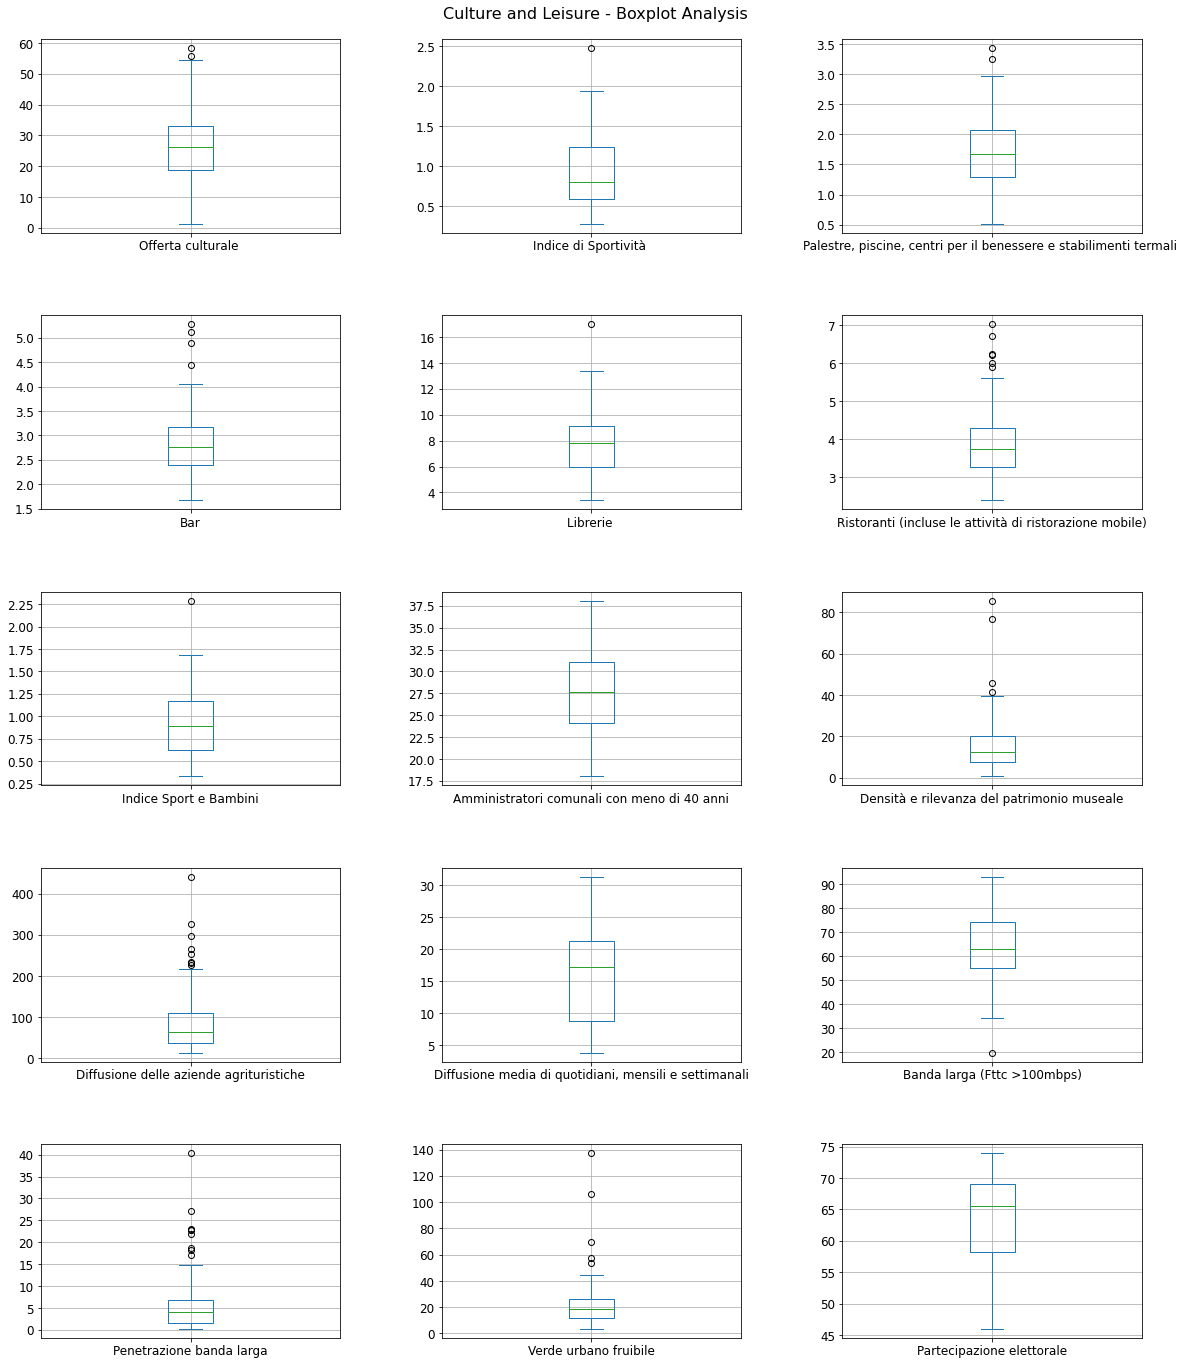

In [ ]:
makeboxplot(QDV_CultureAndLeisure22,CultureAndLeisure22,"Culture and Leisure")

In [ ]:
QDV_CultureAndLeisure22.corr()

,Amministratori comunali con meno di 40 anni,Banda larga (Fttc >100mbps),Bar,Densità e rilevanza del patrimonio museale,Diffusione delle aziende agrituristiche,"Diffusione media di quotidiani, mensili e settimanali",Indice Sport e Bambini,Indice di Sportività,Librerie,Offerta culturale,"Palestre, piscine, centri per il benessere e stabilimenti termali",Partecipazione elettorale,Penetrazione banda larga,Ristoranti (incluse le attività di ristorazione mobile),Verde urbano fruibile
Amministratori comunali con meno di 40 anni,1.000000,-0.181156,-0.144386,0.005384,-0.256185,-0.382729,-0.196558,-0.194301,-0.142956,-0.415546,-0.351214,-0.185304,-0.143988,-0.229561,-0.129734
Banda larga (Fttc >100mbps),-0.181156,1.000000,-0.380413,-0.233388,0.051485,-0.030791,0.239540,0.153878,-0.063749,0.334378,0.046434,0.115457,0.352099,-0.131063,0.022187
Bar,-0.144386,-0.380413,1.000000,0.238534,-0.012017,0.358345,-0.148249,-0.018501,0.331161,0.025299,0.104333,-0.120835,-0.151653,0.651024,-0.055763
Densità e rilevanza del patrimonio museale,0.005384,-0.233388,0.238534,1.000000,0.422197,0.282132,0.013929,0.223252,0.281388,0.176146,0.213917,0.116482,-0.117709,0.383529,-0.000715
Diffusione delle aziende agrituristiche,-0.256185,0.051485,-0.012017,0.422197,1.000000,0.395497,0.171003,0.288315,0.120975,0.393322,0.368852,0.329083,-0.072572,0.313534,0.011812
"Diffusione media di quotidiani, mensili e settimanali",-0.382729,-0.030791,0.358345,0.282132,0.395497,1.000000,0.533224,0.667785,-0.033573,0.461984,0.573806,0.619175,0.045677,0.189245,0.313423
Indice Sport e Bambini,-0.196558,0.239540,-0.148249,0.013929,0.171003,0.533224,1.000000,0.759166,-0.199228,0.329315,0.489212,0.692792,0.165500,-0.210727,0.137098
Indice di Sportività,-0.194301,0.153878,-0.018501,0.223252,0.288315,0.667785,0.759166,1.000000,-0.165071,0.404069,0.582363,0.599784,0.235898,-0.045820,0.144721
Librerie,-0.142956,-0.063749,0.331161,0.281388,0.120975,-0.033573,-0.199228,-0.165071,1.000000,0.174949,0.020089,-0.076327,0.044894,0.539626,-0.105311
Offerta culturale,-0.415546,0.334378,0.025299,0.176146,0.393322,0.461984,0.329315,0.404069,0.174949,1.000000,0.586528,0.499794,0.390176,0.258960,0.269915


In [ ]:
corr_matrix(QDV_CultureAndLeisure22)

,Amministratori comunali con meno di 40 anni,Banda larga (Fttc >100mbps),Bar,Densità e rilevanza del patrimonio museale,Diffusione delle aziende agrituristiche,"Diffusione media di quotidiani, mensili e settimanali",Indice Sport e Bambini,Indice di Sportività,Librerie,Offerta culturale,"Palestre, piscine, centri per il benessere e stabilimenti termali",Partecipazione elettorale,Penetrazione banda larga,Ristoranti (incluse le attività di ristorazione mobile),Verde urbano fruibile
Amministratori comunali con meno di 40 anni,,,,,,,,,,,,,,,
Banda larga (Fttc >100mbps),,,,,,,,,,,,,,,
Bar,,,,,,,,,,,,,,,
Densità e rilevanza del patrimonio museale,,,,,,,,,,,,,,,
Diffusione delle aziende agrituristiche,,,,,,,,,,,,,,,
"Diffusione media di quotidiani, mensili e settimanali",,,,,,,,,,,,,,,
Indice Sport e Bambini,,,,,,,,0.759166,,,,,,,
Indice di Sportività,,,,,,,0.759166,,,,,,,,
Librerie,,,,,,,,,,,,,,,
Offerta culturale,,,,,,,,,,,,,,,


### Business and work

In [ ]:
QDV_BusinessAndWork22 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_BusinessAndWork22.csv',sep=',')

In [ ]:
QDV_BusinessAndWork22

,Province,Cessazioni,Densità di posti letto nelle strutture ricettive,Giovani che non lavorano e non studiano (Neet),Imprenditorialità giovanile,Imprese che fanno ecommerce,Imprese straniere,Infortuni sul lavoro,Numero di ore cig autorizzate,Numero pensioni di vecchiaia,Nuove iscrizioni,Partecipazione alla formazione continua,Qualità ricettiva delle strutture alberghiere,Quota di export sul Pil,Startup innovative,Tasso di occupazione
0,Agrigento,4.098281,6.153656,34.7,10.905350,0.321956,0.0803,0.193974,1.228928,131.395374,4.613895,6.5,3.654936,2.9,1.74,43.433333
1,Alessandria,5.164137,3.416054,11.9,7.006740,0.429133,0.1129,0.393073,21.368448,243.626689,5.122921,8.6,3.167032,52.8,4.14,71.266667
2,Ancona,5.285545,24.270924,14.0,6.798689,0.571787,0.0948,0.086628,71.485926,226.243922,4.706785,12.2,3.109075,33.0,8.93,69.933333
3,Arezzo,4.383436,8.927023,14.2,7.085702,0.571167,0.1310,0.179300,13.258318,233.326560,4.852224,6.7,3.287020,114.5,4.27,73.666667
4,Ascoli Piceno,4.690014,20.994336,14.3,6.698841,0.544487,0.0861,0.345992,68.585200,209.428768,4.661139,9.9,3.091668,48.7,11.63,64.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Vercelli,4.694505,2.927554,22.1,8.293839,0.557192,0.1160,0.180985,45.249456,261.444257,4.861022,9.1,2.942641,59.9,1.11,66.333333
103,Verona,4.837859,53.933760,9.5,7.554609,0.525006,0.1237,0.269656,20.266963,202.050894,5.379733,11.5,3.228599,46.0,8.58,72.033333
104,Vibo Valentia,4.432113,33.390682,26.9,12.481983,0.425195,0.0548,0.132712,7.293528,169.699141,5.592390,12.4,3.354371,1.4,2.24,43.433333
105,Vicenza,4.656344,10.655110,11.9,6.858181,0.628563,0.0958,0.152428,59.672699,211.703900,4.891588,10.6,3.154066,73.4,6.32,71.666667


In [ ]:
QDV_BusinessAndWork22.describe()

,Cessazioni,Densità di posti letto nelle strutture ricettive,Giovani che non lavorano e non studiano (Neet),Imprenditorialità giovanile,Imprese che fanno ecommerce,Imprese straniere,Infortuni sul lavoro,Numero di ore cig autorizzate,Numero pensioni di vecchiaia,Nuove iscrizioni,Partecipazione alla formazione continua,Qualità ricettiva delle strutture alberghiere,Quota di export sul Pil,Startup innovative,Tasso di occupazione
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,4.400262,20.442852,22.096262,8.406942,0.525383,0.099353,0.249068,27.793966,197.006725,5.071645,9.596262,3.320539,30.565421,6.748089,63.168847
std,0.624345,27.544539,7.607704,1.555978,0.143574,0.040151,0.124457,27.625531,37.319126,0.673450,2.729535,0.230984,22.951138,2.861078,10.437313
min,2.715556,1.141895,9.500000,6.147848,0.160710,0.037200,0.000000,0.060268,103.740095,3.583982,4.600000,2.907070,0.600000,1.110000,40.900000
25%,4.033473,6.192225,16.200000,7.070402,0.410948,0.068800,0.166077,8.198231,170.245728,4.637517,7.750000,3.137880,10.900000,4.330000,56.050000
50%,4.440333,11.983239,20.200000,8.133379,0.525006,0.097900,0.229091,20.266963,203.286646,5.122921,9.100000,3.282254,27.500000,6.750000,67.900000
75%,4.839178,22.357898,26.150000,9.410360,0.612205,0.122750,0.321771,38.776030,224.094925,5.442120,11.150000,3.518553,47.300000,8.385000,71.600000
max,6.380003,184.303275,46.300000,12.481983,0.970552,0.317800,0.873145,137.404854,290.610993,7.939295,19.600000,3.790829,114.500000,14.740000,75.800000


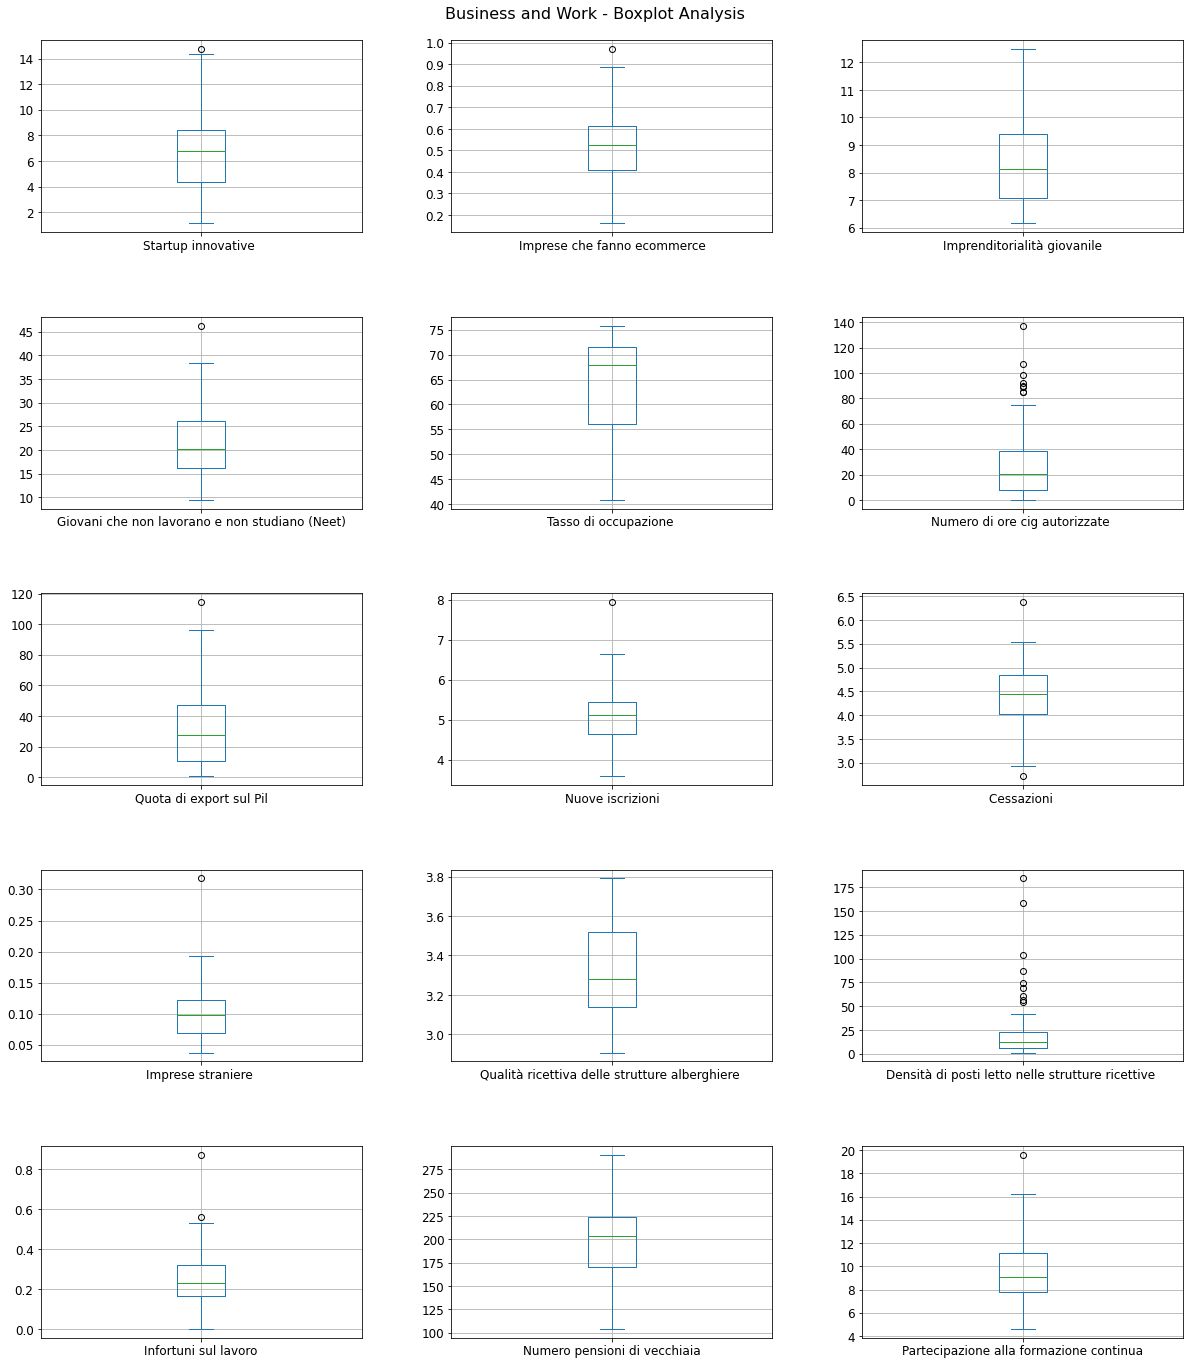

In [ ]:
makeboxplot(QDV_BusinessAndWork22,BusinessAndWork22,"Business and Work")

In [ ]:
QDV_BusinessAndWork22.corr()

,Cessazioni,Densità di posti letto nelle strutture ricettive,Giovani che non lavorano e non studiano (Neet),Imprenditorialità giovanile,Imprese che fanno ecommerce,Imprese straniere,Infortuni sul lavoro,Numero di ore cig autorizzate,Numero pensioni di vecchiaia,Nuove iscrizioni,Partecipazione alla formazione continua,Qualità ricettiva delle strutture alberghiere,Quota di export sul Pil,Startup innovative,Tasso di occupazione
Cessazioni,1.000000,0.166006,-0.610077,-0.413109,0.380652,0.622842,0.129124,0.225471,0.651244,0.553977,0.215863,-0.489960,0.411431,0.087074,0.701139
Densità di posti letto nelle strutture ricettive,0.166006,1.000000,-0.150918,-0.194073,0.257373,0.288676,-0.150391,-0.052297,0.024036,0.384397,0.179995,-0.106507,-0.027441,0.106362,0.177461
Giovani che non lavorano e non studiano (Neet),-0.610077,-0.150918,1.000000,0.682811,-0.210468,-0.468785,-0.041688,-0.194433,-0.733340,-0.313937,-0.516805,0.509642,-0.555484,-0.205115,-0.893498
Imprenditorialità giovanile,-0.413109,-0.194073,0.682811,1.000000,-0.153351,-0.445962,-0.029231,-0.246338,-0.686674,-0.049282,-0.416857,0.430300,-0.517240,-0.105593,-0.773640
Imprese che fanno ecommerce,0.380652,0.257373,-0.210468,-0.153351,1.000000,0.367344,-0.129739,0.244628,0.049463,0.459394,0.146998,0.025467,0.295363,0.157607,0.267266
Imprese straniere,0.622842,0.288676,-0.468785,-0.445962,0.367344,1.000000,-0.054082,-0.047582,0.394246,0.672285,0.316530,-0.238179,0.360352,0.046224,0.580173
Infortuni sul lavoro,0.129124,-0.150391,-0.041688,-0.029231,-0.129739,-0.054082,1.000000,0.119076,0.174749,-0.071778,0.006534,-0.170832,0.009018,0.204115,0.115931
Numero di ore cig autorizzate,0.225471,-0.052297,-0.194433,-0.246338,0.244628,-0.047582,0.119076,1.000000,0.273830,-0.019298,0.025359,-0.216224,0.340728,0.210716,0.206856
Numero pensioni di vecchiaia,0.651244,0.024036,-0.733340,-0.686674,0.049463,0.394246,0.174749,0.273830,1.000000,0.171069,0.372690,-0.576942,0.480199,0.148920,0.832873
Nuove iscrizioni,0.553977,0.384397,-0.313937,-0.049282,0.459394,0.672285,-0.071778,-0.019298,0.171069,1.000000,0.225572,0.018821,0.159811,0.070410,0.379241


In [ ]:
corr_matrix(QDV_BusinessAndWork22)

,Cessazioni,Densità di posti letto nelle strutture ricettive,Giovani che non lavorano e non studiano (Neet),Imprenditorialità giovanile,Imprese che fanno ecommerce,Imprese straniere,Infortuni sul lavoro,Numero di ore cig autorizzate,Numero pensioni di vecchiaia,Nuove iscrizioni,Partecipazione alla formazione continua,Qualità ricettiva delle strutture alberghiere,Quota di export sul Pil,Startup innovative,Tasso di occupazione
Cessazioni,,,,,,,,,,,,,,,0.701139
Densità di posti letto nelle strutture ricettive,,,,,,,,,,,,,,,
Giovani che non lavorano e non studiano (Neet),,,,,,,,,-0.73334,,,,,,-0.893498
Imprenditorialità giovanile,,,,,,,,,,,,,,,-0.77364
Imprese che fanno ecommerce,,,,,,,,,,,,,,,
Imprese straniere,,,,,,,,,,,,,,,
Infortuni sul lavoro,,,,,,,,,,,,,,,
Numero di ore cig autorizzate,,,,,,,,,,,,,,,
Numero pensioni di vecchiaia,,,-0.73334,,,,,,,,,,,,0.832873
Nuove iscrizioni,,,,,,,,,,,,,,,


### Demography and Society

In [ ]:
QDV_DemographyAndSociety22 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_DemographyAndSociety22.csv',sep=',')

In [ ]:
QDV_DemographyAndSociety22

,Province,Casi Covid-19,Densità abitativa,Età media al parto,Immigrati regolari residenti,Indice di dipendenza strutturale,Iscritti all'Aire,Laureati e altri titoli terziari,Medici di medicina generale,Medici specialisti,Numero medio di anni di studio della popolazione,Persone con almeno il diploma,Qualità della vita delle donne,Quoziente di natalità,Saldo migratorio totale,Speranza di vita alla nascita
0,Agrigento,256.758166,135.70390,31.9,3.591908,56.6599,38.730006,21.4,0.838936,22.0,9.943972,55.6,360.67,7.2,-2.0,80.300000
1,Alessandria,213.094738,114.70100,32.0,11.627593,64.0791,10.429948,17.7,0.714902,28.3,10.385706,62.1,596.17,5.3,4.0,82.133333
2,Ancona,296.003205,235.90520,32.6,8.813306,61.0732,9.950730,37.4,0.669201,43.0,11.239438,72.5,671.73,6.1,1.7,83.000000
3,Arezzo,264.234955,103.79460,32.3,10.610398,61.0076,4.398836,32.2,0.702260,26.9,10.227227,61.4,664.80,6.4,1.5,82.900000
4,Ascoli Piceno,346.317907,165.20440,33.1,6.672203,60.2302,9.109467,28.4,0.845208,27.6,10.642365,66.9,579.17,5.9,1.8,83.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Vercelli,207.402268,79.81364,32.1,8.889358,63.5341,7.645994,25.1,0.748069,26.5,10.421049,61.2,575.71,6.0,4.4,81.600000
103,Verona,295.074576,299.56690,32.5,12.480531,55.7946,5.863610,34.6,0.630994,32.5,11.158310,72.7,630.31,7.2,2.4,83.633333
104,Vibo Valentia,243.135459,131.57950,32.0,4.457141,56.5530,34.623296,24.4,0.716646,20.0,10.007097,56.9,306.87,7.1,-4.8,81.733333
105,Vicenza,323.663528,313.70760,32.5,9.419120,55.4377,12.359810,30.4,0.710550,21.3,10.522986,63.3,696.50,7.2,0.7,83.500000


In [ ]:
QDV_DemographyAndSociety22.describe()

,Casi Covid-19,Densità abitativa,Età media al parto,Immigrati regolari residenti,Indice di dipendenza strutturale,Iscritti all'Aire,Laureati e altri titoli terziari,Medici di medicina generale,Medici specialisti,Numero medio di anni di studio della popolazione,Persone con almeno il diploma,Qualità della vita delle donne,Quoziente di natalità,Saldo migratorio totale,Speranza di vita alla nascita
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,260.425576,264.761559,32.357944,8.222438,58.583206,11.723453,26.720561,0.728827,29.385981,10.441673,61.739252,559.920654,6.488785,1.109346,82.386916
std,39.453006,376.192530,0.504328,3.778072,3.430635,8.685627,6.218638,0.073034,7.496697,0.579385,7.559834,104.361171,0.823055,3.047967,0.895584
min,172.847724,35.550370,30.700000,1.639173,49.770000,2.756461,10.500000,0.580469,19.000000,8.868641,42.700000,306.870000,4.900000,-10.300000,80.200000
25%,229.637349,103.401750,32.100000,5.056256,55.916950,5.908081,21.800000,0.667748,23.300000,10.014605,55.450000,483.765000,5.900000,-0.700000,81.833333
50%,262.244464,173.110200,32.400000,8.794935,58.433800,9.504194,26.800000,0.721986,27.400000,10.437697,62.500000,583.150000,6.400000,1.500000,82.533333
75%,286.649392,275.485400,32.700000,10.903549,60.712850,12.956963,30.750000,0.779170,34.600000,10.722318,67.350000,641.110000,7.000000,2.950000,83.000000
max,346.317907,2524.963000,33.300000,22.638305,67.274600,51.984203,44.300000,0.902618,51.300000,11.989262,75.700000,741.660000,9.700000,9.700000,83.966667


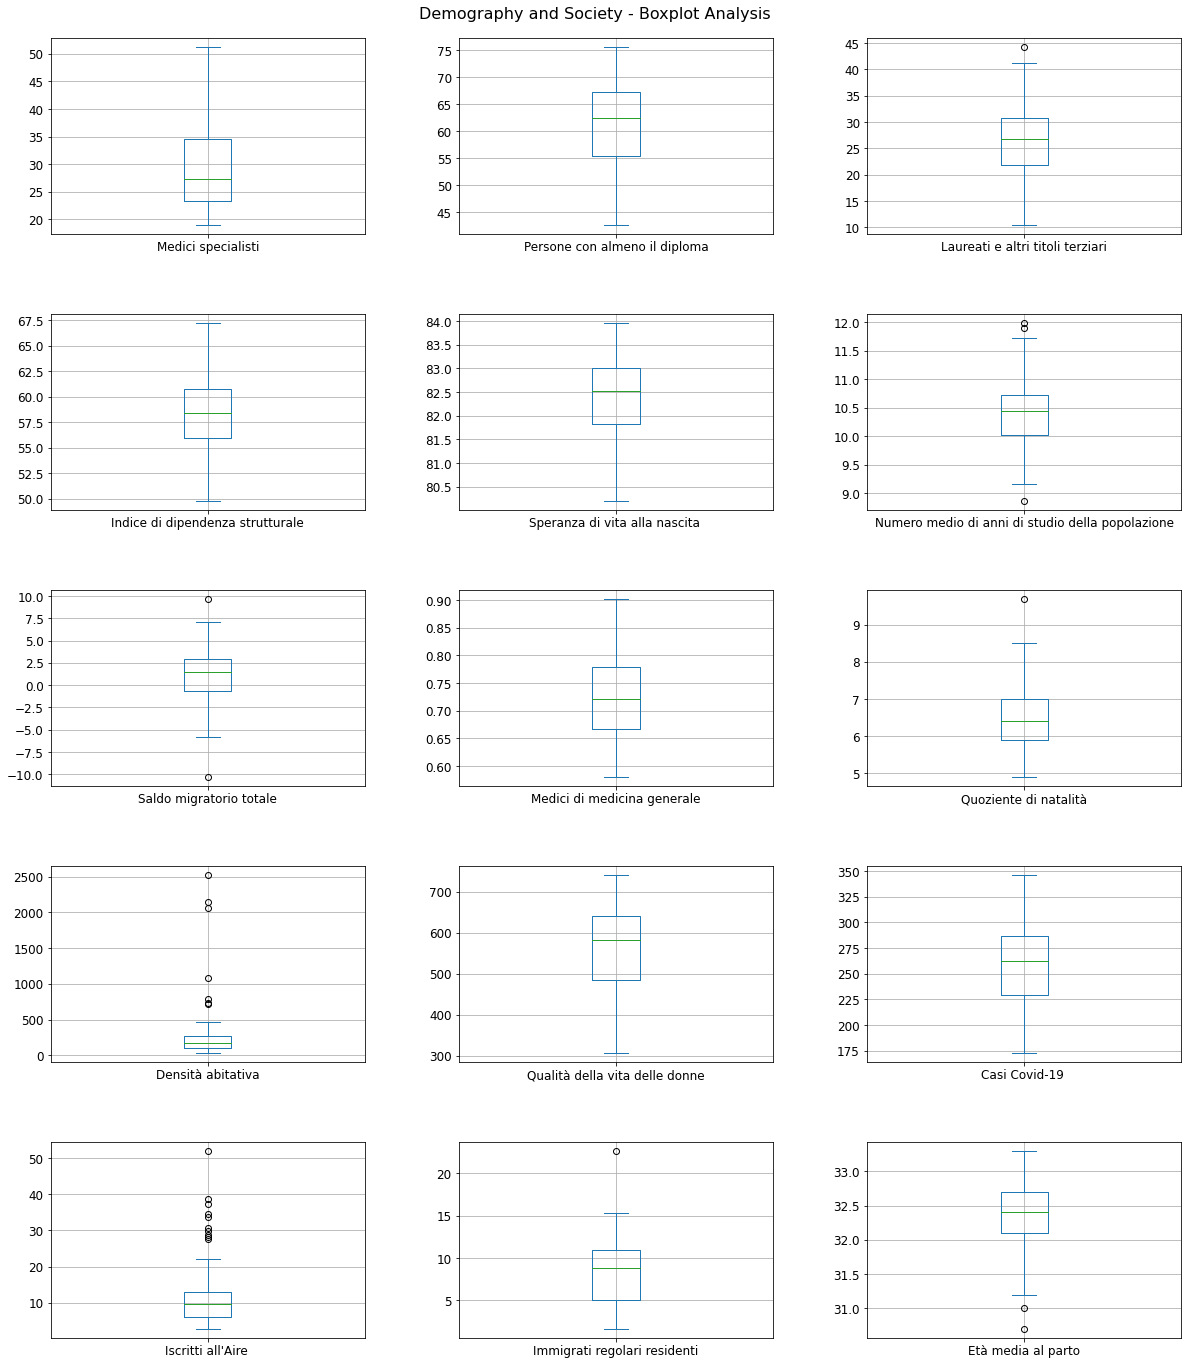

In [ ]:
makeboxplot(QDV_DemographyAndSociety22,DemographyAndSociety22,"Demography and Society")

In [ ]:
QDV_DemographyAndSociety22.corr()

,Casi Covid-19,Densità abitativa,Età media al parto,Immigrati regolari residenti,Indice di dipendenza strutturale,Iscritti all'Aire,Laureati e altri titoli terziari,Medici di medicina generale,Medici specialisti,Numero medio di anni di studio della popolazione,Persone con almeno il diploma,Qualità della vita delle donne,Quoziente di natalità,Saldo migratorio totale,Speranza di vita alla nascita
Casi Covid-19,1.000000,-0.051625,0.094658,-0.047952,-0.002317,-0.024194,0.214082,0.167825,0.114365,0.114693,0.159830,-0.032896,0.024819,-0.014132,0.107923
Densità abitativa,-0.051625,1.000000,0.120178,0.182114,-0.207113,-0.232218,0.246084,-0.306343,0.129035,0.241822,0.102090,0.095487,0.210670,0.064352,0.107192
Età media al parto,0.094658,0.120178,1.000000,-0.023833,0.111109,-0.024595,0.512911,-0.059041,0.255829,0.402262,0.392579,0.383951,-0.455243,0.060096,0.443801
Immigrati regolari residenti,-0.047952,0.182114,-0.023833,1.000000,0.229546,-0.517862,0.356172,-0.505348,0.029507,0.465711,0.470511,0.636118,-0.002191,0.651060,0.586927
Indice di dipendenza strutturale,-0.002317,-0.207113,0.111109,0.229546,1.000000,-0.105960,0.260611,-0.026912,0.137688,0.275947,0.363043,0.421896,-0.652034,0.440003,0.223384
Iscritti all'Aire,-0.024194,-0.232218,-0.024595,-0.517862,-0.105960,1.000000,-0.212371,0.360479,-0.153115,-0.258109,-0.179628,-0.502391,0.055188,-0.527388,-0.543718
Laureati e altri titoli terziari,0.214082,0.246084,0.512911,0.356172,0.260611,-0.212371,1.000000,-0.207482,0.305721,0.820367,0.799255,0.564896,-0.207645,0.397716,0.569414
Medici di medicina generale,0.167825,-0.306343,-0.059041,-0.505348,-0.026912,0.360479,-0.207482,1.000000,0.165671,-0.223426,-0.225961,-0.479801,-0.063485,-0.427349,-0.489506
Medici specialisti,0.114365,0.129035,0.255829,0.029507,0.137688,-0.153115,0.305721,0.165671,1.000000,0.378175,0.237932,0.144485,-0.125629,0.107076,0.104917
Numero medio di anni di studio della popolazione,0.114693,0.241822,0.402262,0.465711,0.275947,-0.258109,0.820367,-0.223426,0.378175,1.000000,0.941090,0.560517,-0.130924,0.523032,0.547079


In [ ]:
corr_matrix(QDV_DemographyAndSociety22)

,Casi Covid-19,Densità abitativa,Età media al parto,Immigrati regolari residenti,Indice di dipendenza strutturale,Iscritti all'Aire,Laureati e altri titoli terziari,Medici di medicina generale,Medici specialisti,Numero medio di anni di studio della popolazione,Persone con almeno il diploma,Qualità della vita delle donne,Quoziente di natalità,Saldo migratorio totale,Speranza di vita alla nascita
Casi Covid-19,,,,,,,,,,,,,,,
Densità abitativa,,,,,,,,,,,,,,,
Età media al parto,,,,,,,,,,,,,,,
Immigrati regolari residenti,,,,,,,,,,,,,,,
Indice di dipendenza strutturale,,,,,,,,,,,,,,,
Iscritti all'Aire,,,,,,,,,,,,,,,
Laureati e altri titoli terziari,,,,,,,,,,0.820367,0.799255,,,,
Medici di medicina generale,,,,,,,,,,,,,,,
Medici specialisti,,,,,,,,,,,,,,,
Numero medio di anni di studio della popolazione,,,,,,,0.820367,,,,0.94109,,,,


### Environment and Services

In [ ]:
QDV_EnvironmentAndServices22 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_EnvironmentAndServices22.csv',sep=',')

In [ ]:
QDV_EnvironmentAndServices22

,Province,ANZIANI,BAMBINI,Consumi energetici,Ecosistema urbano,Energia elettrica da fonti rinnovabili,GIOVANI,Giorni consecutivi senza pioggia,ICityRank,Illuminazione pubblica sostenibile,Indice del clima,Isole pedonali,Piste ciclabili,Qualità dell'aria,Sportelli bancari (Atm),Tasso di motorizzazione
0,Agrigento,335.045255,315.740731,34.337632,0.516010,75.981771,520.963122,46.0,22.0,76.923077,683.5,0.095622,1.470598,26.977982,4.5,76.231600
1,Alessandria,341.155335,443.373950,117.741148,0.322408,28.361523,497.936756,33.5,55.0,36.358721,454.2,0.214316,13.429597,77.750839,7.8,64.773517
2,Ancona,414.070496,475.138410,88.957150,0.614848,56.981813,471.341707,25.0,54.0,29.673176,714.8,0.432851,1.633644,36.600428,7.5,62.006094
3,Arezzo,383.846070,512.638322,83.688714,0.595961,13.583150,503.544048,22.0,63.0,37.178407,597.6,0.204289,8.153155,44.210143,7.4,69.127777
4,Ascoli Piceno,376.022974,395.539577,105.579723,0.489995,86.256281,516.389282,24.0,47.0,88.846277,610.4,0.575099,2.013439,45.502538,8.9,71.764328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Vercelli,297.443180,445.835266,102.316132,0.491902,4.596563,554.723333,16.0,56.0,31.475916,479.6,0.005870,20.013050,68.932263,9.8,66.426158
103,Verona,471.905896,416.168610,127.582367,0.460933,54.497895,455.065999,21.0,75.0,22.536058,538.2,0.161509,11.682098,70.683527,8.3,63.384761
104,Vibo Valentia,311.318894,312.042580,40.272939,0.525121,85.917496,518.570668,37.0,48.0,42.681445,581.6,0.076416,0.118676,36.305865,3.5,78.959385
105,Vicenza,414.524086,445.036402,156.247779,0.576967,54.611614,493.277054,21.0,70.0,8.966658,530.9,0.254032,23.002649,78.215254,6.9,64.447799


In [ ]:
QDV_EnvironmentAndServices22.describe()

,ANZIANI,BAMBINI,Consumi energetici,Ecosistema urbano,Energia elettrica da fonti rinnovabili,GIOVANI,Giorni consecutivi senza pioggia,ICityRank,Illuminazione pubblica sostenibile,Indice del clima,Isole pedonali,Piste ciclabili,Qualità dell'aria,Sportelli bancari (Atm),Tasso di motorizzazione
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,401.735697,390.227512,80.138697,0.532032,50.262774,482.125377,27.467290,55.724299,46.177670,593.485981,0.467326,9.669754,51.320507,6.680374,65.536114
std,58.284535,62.113084,30.861987,0.106569,32.557958,40.956407,12.308969,17.104043,37.170944,80.152097,0.854975,9.321541,16.096653,2.354780,6.789265
min,276.767620,250.686821,23.181049,0.219420,2.160990,344.702516,13.000000,15.000000,0.000000,429.900000,0.000000,0.000000,20.289855,2.800000,42.756319
25%,366.392521,352.406180,56.786509,0.463385,20.210663,454.566993,20.000000,42.000000,9.985184,535.600000,0.144890,2.273293,39.056024,4.850000,61.772799
50%,399.945788,395.775779,79.741540,0.529072,50.660924,483.956751,23.000000,56.000000,42.681445,594.500000,0.273369,7.059342,46.829659,6.700000,64.963007
75%,434.598934,435.067485,103.744281,0.609453,83.125127,508.215204,33.000000,67.000000,84.262196,645.550000,0.460797,16.365421,62.340931,7.800000,70.409938
max,590.346341,596.865462,156.247779,0.790177,99.672852,590.769034,81.500000,90.000000,100.000000,780.600000,6.794169,46.500896,87.249908,19.000000,79.575138


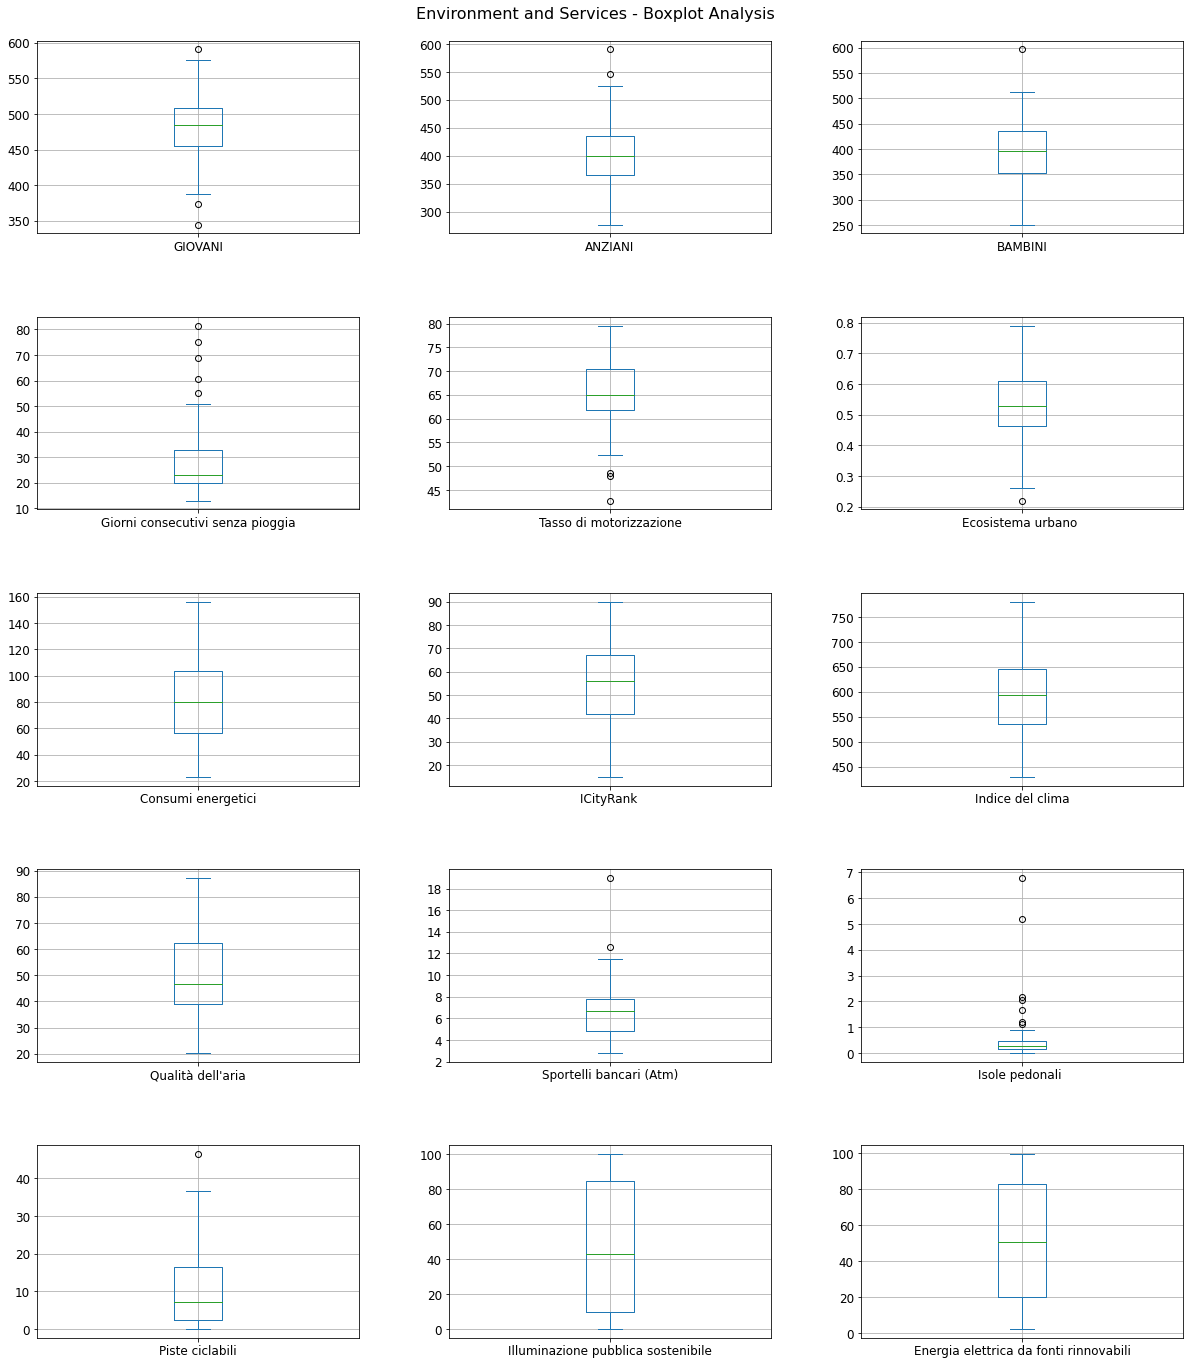

In [ ]:
makeboxplot(QDV_EnvironmentAndServices22,EnvironmentAndServices22,"Environment and Services")

In [ ]:
QDV_EnvironmentAndServices22.corr()

,ANZIANI,BAMBINI,Consumi energetici,Ecosistema urbano,Energia elettrica da fonti rinnovabili,GIOVANI,Giorni consecutivi senza pioggia,ICityRank,Illuminazione pubblica sostenibile,Indice del clima,Isole pedonali,Piste ciclabili,Qualità dell'aria,Sportelli bancari (Atm),Tasso di motorizzazione
ANZIANI,1.000000,0.288186,0.264771,0.292248,-0.029255,-0.000151,0.005034,0.394648,0.081686,0.006212,-0.103445,0.128792,0.217200,0.201676,-0.195146
BAMBINI,0.288186,1.000000,0.518199,0.416836,-0.006065,0.140352,-0.383019,0.330381,0.079017,-0.251320,0.000845,0.283289,0.207066,0.633719,-0.110117
Consumi energetici,0.264771,0.518199,1.000000,0.423529,-0.077843,0.309155,-0.615041,0.459642,0.036941,-0.547155,0.128249,0.517648,0.568335,0.622134,-0.227418
Ecosistema urbano,0.292248,0.416836,0.423529,1.000000,-0.008225,0.155922,-0.374019,0.302766,0.155850,-0.248480,0.241699,0.494611,0.053978,0.506426,-0.170944
Energia elettrica da fonti rinnovabili,-0.029255,-0.006065,-0.077843,-0.008225,1.000000,-0.018318,0.065515,-0.286168,0.043977,0.116033,-0.139814,-0.080721,-0.224731,0.037464,0.358422
GIOVANI,-0.000151,0.140352,0.309155,0.155922,-0.018318,1.000000,-0.274281,0.010816,-0.015684,-0.344042,-0.165290,0.247948,0.176157,0.211587,0.135898
Giorni consecutivi senza pioggia,0.005034,-0.383019,-0.615041,-0.374019,0.065515,-0.274281,1.000000,-0.318473,0.118932,0.252805,-0.143794,-0.299207,-0.359855,-0.539291,0.343541
ICityRank,0.394648,0.330381,0.459642,0.302766,-0.286168,0.010816,-0.318473,1.000000,0.139084,-0.171082,0.116751,0.335341,0.507639,0.429480,-0.531083
Illuminazione pubblica sostenibile,0.081686,0.079017,0.036941,0.155850,0.043977,-0.015684,0.118932,0.139084,1.000000,-0.166397,-0.024564,0.189130,0.109727,0.068934,0.065709
Indice del clima,0.006212,-0.251320,-0.547155,-0.248480,0.116033,-0.344042,0.252805,-0.171082,-0.166397,1.000000,-0.023979,-0.450514,-0.533701,-0.245345,0.009141


In [ ]:
corr_matrix(QDV_EnvironmentAndServices22)

,ANZIANI,BAMBINI,Consumi energetici,Ecosistema urbano,Energia elettrica da fonti rinnovabili,GIOVANI,Giorni consecutivi senza pioggia,ICityRank,Illuminazione pubblica sostenibile,Indice del clima,Isole pedonali,Piste ciclabili,Qualità dell'aria,Sportelli bancari (Atm),Tasso di motorizzazione
ANZIANI,,,,,,,,,,,,,,,
BAMBINI,,,0.518199,,,,,,,,,,,0.633719,
Consumi energetici,,0.518199,,,,,-0.615041,,,-0.547155,,0.517648,0.568335,0.622134,
Ecosistema urbano,,,,,,,,,,,,,,0.506426,
Energia elettrica da fonti rinnovabili,,,,,,,,,,,,,,,
GIOVANI,,,,,,,,,,,,,,,
Giorni consecutivi senza pioggia,,,-0.615041,,,,,,,,,,,-0.539291,
ICityRank,,,,,,,,,,,,,0.507639,,-0.531083
Illuminazione pubblica sostenibile,,,,,,,,,,,,,,,
Indice del clima,,,-0.547155,,,,,,,,,,-0.533701,,


### Justice and Security

In [ ]:
QDV_JusticeAndSecurity22 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_JusticeAndSecurity22.csv',sep=',')

In [ ]:
QDV_JusticeAndSecurity22

,Province,Comuni: capacità di riscossione,Delitti informatici,Durata media delle cause civili,Estorsioni,Furti con strappo,Furti in abitazione,Incendi,Indice di criminalità - totale dei delitti denunciati,Indice di litigiosità,Indice di rotazione delle cause,Mortalità per incidenti stradali,Quota cause pendenti ultratriennali,Rapine in pubblica via,"Reati legati agli stupefacenti (spaccio, produzione, ecc.)",Riciclaggio e impiego di denaro
0,Agrigento,76.1,14.063095,789.725900,11.395956,6.789080,110.080087,10.183620,2541.8,877.515655,1.171311,1.600000,877.515655,6.304146,40.249547,0.969869
1,Alessandria,78.9,34.148223,404.193951,16.459935,7.124449,291.611084,9.826827,3176.0,971.056475,0.983624,0.600000,971.056475,11.792192,40.535660,0.982683
2,Ancona,81.3,28.154068,440.932776,9.745639,6.930232,152.031966,6.713662,2466.3,1029.196079,1.030962,0.450000,1029.196079,4.114825,54.359008,1.949128
3,Arezzo,77.2,33.768236,294.901282,11.654524,12.252192,167.347012,19.424207,2731.3,983.484445,1.153846,0.766667,983.484445,3.586007,57.973786,2.689506
4,Ascoli Piceno,77.2,19.770954,580.527404,5.437012,10.874024,129.005472,10.379751,2481.7,1075.869478,0.965552,0.400000,1075.869478,4.942738,19.276680,1.977095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Vercelli,80.1,31.370656,218.144531,13.272201,10.859073,104.971042,12.065637,2816.1,799.853322,1.100287,0.450000,799.853322,7.239382,38.610039,0.603282
103,Verona,82.6,43.252782,382.642667,16.071482,17.797279,284.109295,6.471738,3232.4,819.506475,1.070867,0.466667,819.506475,10.678368,39.801188,1.617934
104,Vibo Valentia,71.5,34.505182,1452.980769,25.878887,1.990684,91.571446,24.551764,3229.6,1121.831118,1.288018,0.850000,1121.831118,0.663561,40.477233,1.327122
105,Vicenza,82.3,24.036742,411.861626,13.132269,11.607988,326.547937,3.634824,2739.4,691.220372,1.062300,0.266667,691.220372,8.324920,27.319809,2.110543


In [ ]:
QDV_JusticeAndSecurity22.describe()

,Comuni: capacità di riscossione,Delitti informatici,Durata media delle cause civili,Estorsioni,Furti con strappo,Furti in abitazione,Incendi,Indice di criminalità - totale dei delitti denunciati,Indice di litigiosità,Indice di rotazione delle cause,Mortalità per incidenti stradali,Quota cause pendenti ultratriennali,Rapine in pubblica via,"Reati legati agli stupefacenti (spaccio, produzione, ecc.)",Riciclaggio e impiego di denaro
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,77.377570,36.292766,561.946945,16.002010,13.434627,196.071542,14.534713,3138.115888,1056.502440,1.094713,0.830173,1056.502440,10.376512,49.002140,2.068266
std,4.702214,25.318878,278.484344,4.486538,14.365949,93.051867,14.681095,755.171424,276.164671,0.085444,0.604752,276.164671,10.925290,19.036462,1.648909
min,62.700000,11.865493,159.859644,5.437012,0.641100,46.771486,0.579321,1556.300000,604.597220,0.909702,0.100000,604.597220,0.000000,16.350949,0.000000
25%,75.400000,20.332247,358.035066,12.680073,5.043276,121.427713,5.079895,2645.200000,848.430756,1.035247,0.458333,848.430756,3.686979,34.704016,1.071493
50%,78.300000,31.108069,476.706197,16.071482,9.163635,184.504454,9.826827,2969.000000,1029.196079,1.080127,0.700000,1029.196079,6.504121,48.155840,1.718770
75%,80.600000,42.238851,737.115692,19.079953,17.064499,266.118943,19.649147,3478.500000,1203.310125,1.138199,1.025000,1203.310125,12.081539,59.063536,2.613582
max,86.200000,174.809613,1452.980769,28.898325,105.367510,489.110301,79.305865,5985.300000,2060.324578,1.481346,4.400000,2060.324578,57.564296,116.344547,9.867838


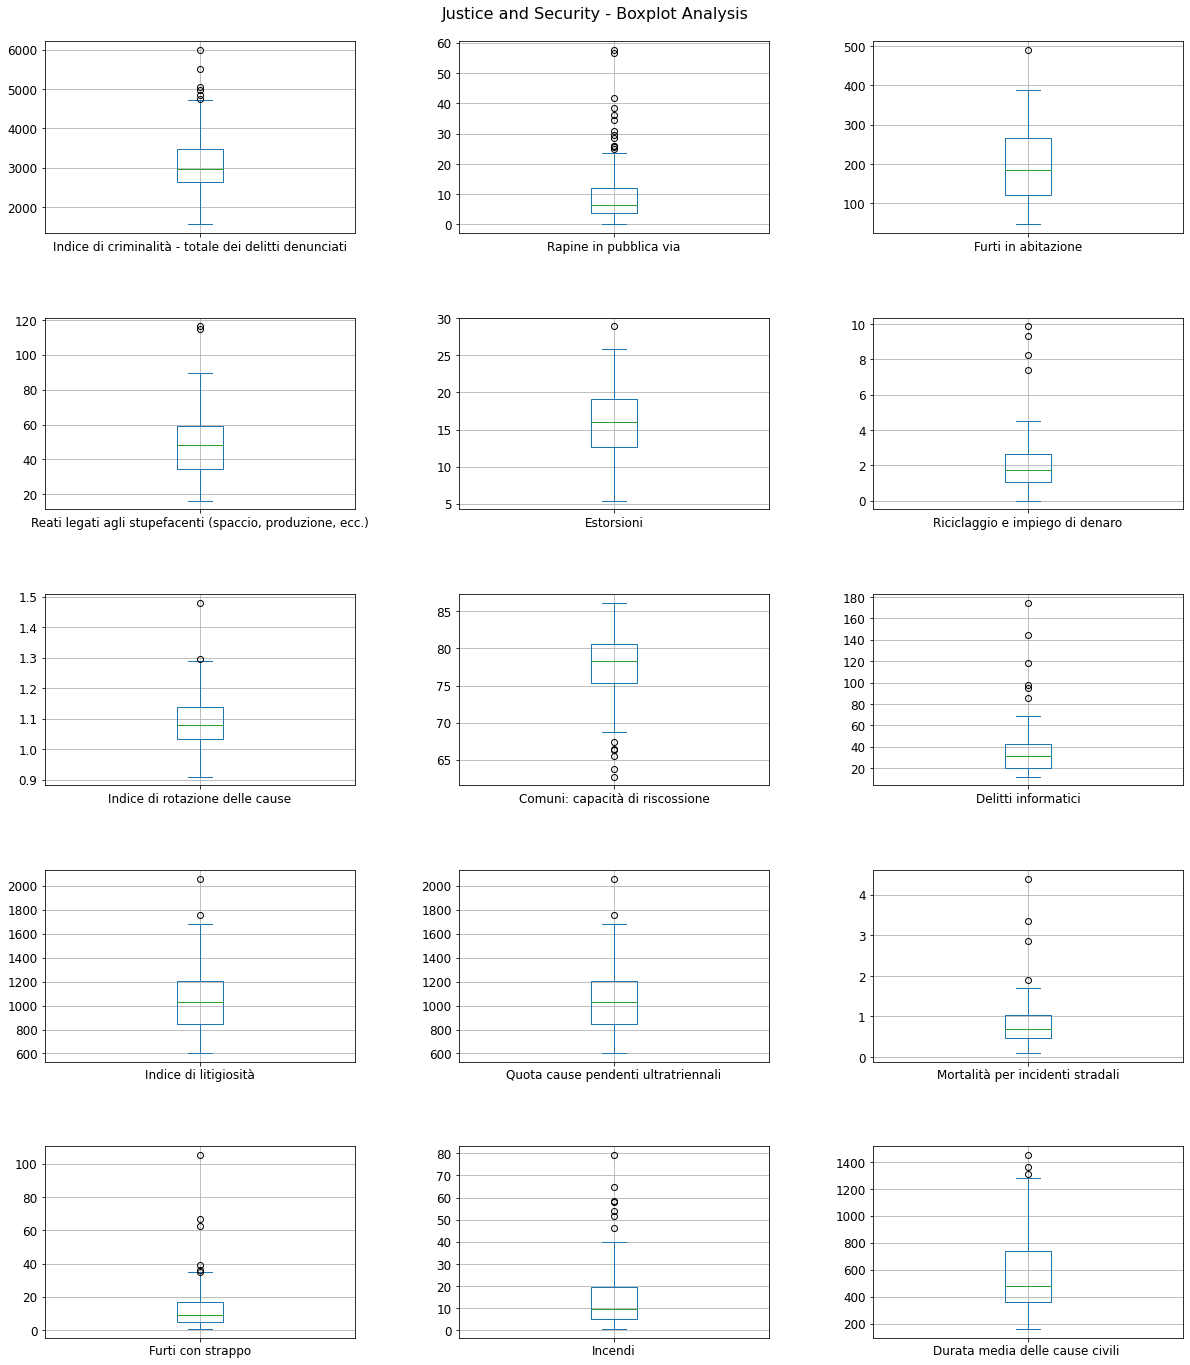

In [ ]:
makeboxplot(QDV_JusticeAndSecurity22,JusticeAndSecurity22,"Justice and Security")

In [ ]:
QDV_JusticeAndSecurity22.corr()

,Comuni: capacità di riscossione,Delitti informatici,Durata media delle cause civili,Estorsioni,Furti con strappo,Furti in abitazione,Incendi,Indice di criminalità - totale dei delitti denunciati,Indice di litigiosità,Indice di rotazione delle cause,Mortalità per incidenti stradali,Quota cause pendenti ultratriennali,Rapine in pubblica via,"Reati legati agli stupefacenti (spaccio, produzione, ecc.)",Riciclaggio e impiego di denaro
Comuni: capacità di riscossione,1.000000,0.173994,-0.560540,-0.186963,0.099768,0.270316,-0.465277,0.073489,-0.436850,-0.195875,-0.076046,-0.436850,0.063301,-0.006682,-0.102104
Delitti informatici,0.173994,1.000000,-0.240210,0.096018,0.155882,0.224346,-0.144917,0.228795,-0.125835,-0.171011,-0.125800,-0.125835,0.135615,0.030013,-0.032887
Durata media delle cause civili,-0.560540,-0.240210,1.000000,0.227055,-0.173435,-0.460429,0.501688,-0.115416,0.490906,0.392597,0.167091,0.490906,-0.088288,0.136303,0.015054
Estorsioni,-0.186963,0.096018,0.227055,1.000000,0.264759,-0.104181,0.157382,0.413447,0.345162,0.158103,-0.154462,0.345162,0.304097,0.245400,0.043792
Furti con strappo,0.099768,0.155882,-0.173435,0.264759,1.000000,0.315884,-0.230375,0.784144,0.166270,-0.057534,-0.222998,0.166270,0.849468,0.208952,0.093751
Furti in abitazione,0.270316,0.224346,-0.460429,-0.104181,0.315884,1.000000,-0.318085,0.466236,-0.269203,-0.281262,0.052668,-0.269203,0.280134,-0.047508,-0.012166
Incendi,-0.465277,-0.144917,0.501688,0.157382,-0.230375,-0.318085,1.000000,-0.087742,0.301474,0.370635,0.126693,0.301474,-0.201741,0.149422,0.059636
Indice di criminalità - totale dei delitti denunciati,0.073489,0.228795,-0.115416,0.413447,0.784144,0.466236,-0.087742,1.000000,0.313666,-0.019324,-0.164909,0.313666,0.790196,0.438114,0.182712
Indice di litigiosità,-0.436850,-0.125835,0.490906,0.345162,0.166270,-0.269203,0.301474,0.313666,1.000000,0.202255,-0.077855,1.000000,0.303932,0.423956,0.058639
Indice di rotazione delle cause,-0.195875,-0.171011,0.392597,0.158103,-0.057534,-0.281262,0.370635,-0.019324,0.202255,1.000000,0.091790,0.202255,0.046280,0.086829,0.181213


In [ ]:
corr_matrix(QDV_JusticeAndSecurity22)

,Comuni: capacità di riscossione,Delitti informatici,Durata media delle cause civili,Estorsioni,Furti con strappo,Furti in abitazione,Incendi,Indice di criminalità - totale dei delitti denunciati,Indice di litigiosità,Indice di rotazione delle cause,Mortalità per incidenti stradali,Quota cause pendenti ultratriennali,Rapine in pubblica via,"Reati legati agli stupefacenti (spaccio, produzione, ecc.)",Riciclaggio e impiego di denaro
Comuni: capacità di riscossione,,,,,,,,,,,,,,,
Delitti informatici,,,,,,,,,,,,,,,
Durata media delle cause civili,,,,,,,,,,,,,,,
Estorsioni,,,,,,,,,,,,,,,
Furti con strappo,,,,,,,,0.784144,,,,,0.849468,,
Furti in abitazione,,,,,,,,,,,,,,,
Incendi,,,,,,,,,,,,,,,
Indice di criminalità - totale dei delitti denunciati,,,,,0.784144,,,,,,,,0.790196,,
Indice di litigiosità,,,,,,,,,,,,,,,
Indice di rotazione delle cause,,,,,,,,,,,,,,,


### Wealth and Consumption

In [ ]:
QDV_WealthAndConsumption22 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_WealthAndConsumption22.csv',sep=',')

In [ ]:
QDV_WealthAndConsumption22

,Province,Assorbimento del settore residenziale,Beneficiari di reddito di cittadinanza (assegni),Canoni medi di locazione,Depositi bancari delle famiglie consumatrici,"Inflazione energia, gas e prodotti combustibili",Inflazione prodotti alimentari e bevande non alcoliche,Investimenti,Pagamenti delle fatture oltre i 30 giorni,Popolazione con crediti attivi,Prezzo medio di vendita delle case,Protesti pro capite,Reddito medio da pensione di vecchiaia,Spazio abitativo,Spesa delle famiglie per il consumo di beni durevoli,Valore aggiunto per abitante
0,Agrigento,81.8,37.805478,21.638982,12.608277,137.0,14.2,16.7,15.6,36.928833,950.0,1.536607,17966.07,84.281797,1891.0,15.2
1,Alessandria,75.1,13.064766,25.519044,21.308336,151.0,12.4,74.5,9.1,47.159912,1450.0,0.985796,19573.10,91.719698,3067.0,28.4
2,Ancona,54.4,7.491148,28.106102,22.157981,135.2,14.1,70.8,7.2,48.510432,1750.0,0.652722,20113.36,68.575840,2820.0,30.1
3,Arezzo,69.7,6.965819,37.294400,19.943768,146.5,15.0,49.3,8.0,47.299940,2100.0,1.007024,18860.80,76.165049,3073.0,28.0
4,Ascoli Piceno,56.5,8.264259,17.869956,20.302234,135.9,14.5,35.2,9.9,45.430748,950.0,0.711688,18271.34,85.871565,2694.0,25.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Vercelli,54.4,12.451737,20.339500,20.794751,148.5,14.2,109.2,6.1,50.628487,1300.0,0.707035,19141.08,87.885423,3100.0,27.2
103,Verona,88.9,4.751334,51.393334,22.129250,121.9,15.5,78.0,6.5,45.534979,3150.0,0.664675,19520.25,69.207129,3288.0,32.6
104,Vibo Valentia,50.0,33.808443,19.336280,15.091054,116.5,14.3,29.0,16.4,37.200945,800.0,2.204876,16926.37,80.933066,2188.0,15.6
105,Vicenza,60.2,3.761457,32.253697,22.056490,129.1,14.2,80.1,6.6,44.997124,2150.0,0.324068,19364.08,75.942086,3269.0,33.8


In [ ]:
QDV_WealthAndConsumption22.describe()

,Assorbimento del settore residenziale,Beneficiari di reddito di cittadinanza (assegni),Canoni medi di locazione,Depositi bancari delle famiglie consumatrici,"Inflazione energia, gas e prodotti combustibili",Inflazione prodotti alimentari e bevande non alcoliche,Investimenti,Pagamenti delle fatture oltre i 30 giorni,Popolazione con crediti attivi,Prezzo medio di vendita delle case,Protesti pro capite,Reddito medio da pensione di vecchiaia,Spazio abitativo,Spesa delle famiglie per il consumo di beni durevoli,Valore aggiunto per abitante
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,67.443375,15.958608,32.199501,19.172255,137.032710,13.771028,55.343925,10.107477,45.860884,1816.869159,1.494520,19563.660860,75.188046,2687.177570,26.137383
std,11.508684,12.981147,13.342304,4.357788,14.674897,1.702718,29.602088,4.125935,5.660698,902.499549,1.582670,1739.835022,12.619155,475.852935,7.231894
min,43.100000,0.533807,14.988240,9.400732,95.900000,10.000000,10.600000,3.500000,25.511269,750.000000,0.081420,16205.640000,49.568645,1711.000000,15.200000
25%,58.350000,6.259019,21.648471,15.698240,123.200000,12.800000,28.700000,6.600000,42.887984,1100.000000,0.663827,18322.385000,66.639697,2177.500000,19.400000
50%,66.400000,10.894143,29.273332,20.155422,141.600000,13.900000,51.600000,8.800000,46.697175,1650.000000,0.961336,19575.980000,73.694577,2746.000000,26.000000
75%,74.050000,22.293545,37.432215,22.190178,146.700000,14.650000,79.050000,13.400000,49.020699,2175.000000,1.758809,20501.465000,82.848354,3101.500000,30.800000
max,92.600000,55.204521,87.829664,29.206614,196.600000,22.900000,122.200000,19.700000,58.498675,5200.000000,10.434964,26621.060000,112.327171,3482.000000,53.300000


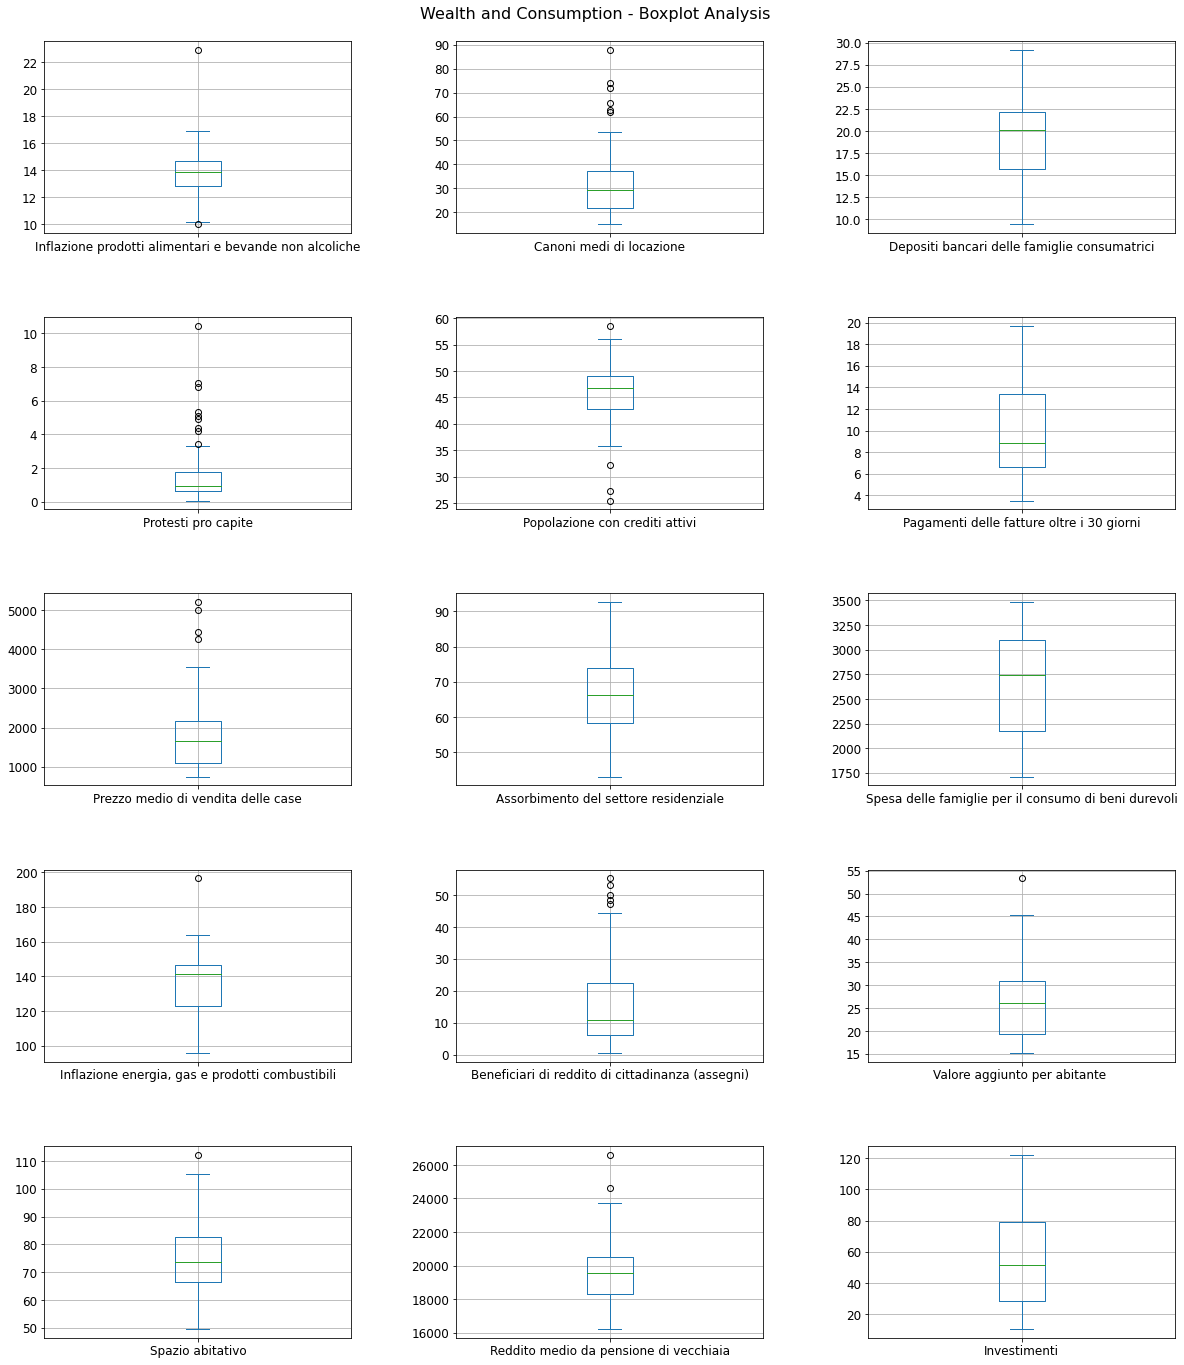

In [ ]:
makeboxplot(QDV_WealthAndConsumption22,WealthAndConsumption22,"Wealth and Consumption")

In [ ]:
QDV_WealthAndConsumption22.corr()

,Assorbimento del settore residenziale,Beneficiari di reddito di cittadinanza (assegni),Canoni medi di locazione,Depositi bancari delle famiglie consumatrici,"Inflazione energia, gas e prodotti combustibili",Inflazione prodotti alimentari e bevande non alcoliche,Investimenti,Pagamenti delle fatture oltre i 30 giorni,Popolazione con crediti attivi,Prezzo medio di vendita delle case,Protesti pro capite,Reddito medio da pensione di vecchiaia,Spazio abitativo,Spesa delle famiglie per il consumo di beni durevoli,Valore aggiunto per abitante
Assorbimento del settore residenziale,1.000000,-0.167163,0.525003,0.263026,0.276470,-0.066620,0.210199,-0.234786,0.079845,0.558455,0.002968,0.422483,-0.224477,0.226819,0.367864
Beneficiari di reddito di cittadinanza (assegni),-0.167163,1.000000,-0.306486,-0.823850,-0.391125,-0.013823,-0.744405,0.885858,-0.162873,-0.394611,0.270928,-0.115915,-0.036275,-0.844191,-0.743068
Canoni medi di locazione,0.525003,-0.306486,1.000000,0.447891,0.158076,-0.092193,0.415328,-0.369124,0.111196,0.932062,0.077823,0.549823,-0.448142,0.403148,0.595153
Depositi bancari delle famiglie consumatrici,0.263026,-0.823850,0.447891,1.000000,0.291257,-0.164172,0.794349,-0.823832,-0.030803,0.573586,-0.112007,0.270341,0.025554,0.797283,0.843780
"Inflazione energia, gas e prodotti combustibili",0.276470,-0.391125,0.158076,0.291257,1.000000,0.085410,0.388469,-0.325285,0.256839,0.193761,-0.315581,0.116854,0.149631,0.460598,0.335264
Inflazione prodotti alimentari e bevande non alcoliche,-0.066620,-0.013823,-0.092193,-0.164172,0.085410,1.000000,-0.076151,0.077487,0.021718,-0.115828,-0.056571,-0.074429,0.095846,-0.054204,-0.036409
Investimenti,0.210199,-0.744405,0.415328,0.794349,0.388469,-0.076151,1.000000,-0.845583,0.051152,0.477885,-0.332300,0.241855,0.068588,0.796291,0.764155
Pagamenti delle fatture oltre i 30 giorni,-0.234786,0.885858,-0.369124,-0.823832,-0.325285,0.077487,-0.845583,1.000000,-0.090268,-0.460924,0.341728,-0.170519,0.035392,-0.839611,-0.764684
Popolazione con crediti attivi,0.079845,-0.162873,0.111196,-0.030803,0.256839,0.021718,0.051152,-0.090268,1.000000,0.170485,0.038110,0.488702,-0.299668,0.303390,0.144603
Prezzo medio di vendita delle case,0.558455,-0.394611,0.932062,0.573586,0.193761,-0.115828,0.477885,-0.460924,0.170485,1.000000,0.173212,0.636977,-0.464645,0.511795,0.729203


In [ ]:
corr_matrix(QDV_WealthAndConsumption22)

,Assorbimento del settore residenziale,Beneficiari di reddito di cittadinanza (assegni),Canoni medi di locazione,Depositi bancari delle famiglie consumatrici,"Inflazione energia, gas e prodotti combustibili",Inflazione prodotti alimentari e bevande non alcoliche,Investimenti,Pagamenti delle fatture oltre i 30 giorni,Popolazione con crediti attivi,Prezzo medio di vendita delle case,Protesti pro capite,Reddito medio da pensione di vecchiaia,Spazio abitativo,Spesa delle famiglie per il consumo di beni durevoli,Valore aggiunto per abitante
Assorbimento del settore residenziale,,,,,,,,,,,,,,,
Beneficiari di reddito di cittadinanza (assegni),,,,-0.82385,,,-0.744405,0.885858,,,,,,-0.844191,-0.743068
Canoni medi di locazione,,,,,,,,,,0.932062,,,,,
Depositi bancari delle famiglie consumatrici,,-0.82385,,,,,0.794349,-0.823832,,,,,,0.797283,0.84378
"Inflazione energia, gas e prodotti combustibili",,,,,,,,,,,,,,,
Inflazione prodotti alimentari e bevande non alcoliche,,,,,,,,,,,,,,,
Investimenti,,-0.744405,,0.794349,,,,-0.845583,,,,,,0.796291,0.764155
Pagamenti delle fatture oltre i 30 giorni,,0.885858,,-0.823832,,,-0.845583,,,,,,,-0.839611,-0.764684
Popolazione con crediti attivi,,,,,,,,,,,,,,,
Prezzo medio di vendita delle case,,,0.932062,,,,,,,,,,,,0.729203


## Data Normalization and Feature Reduction

In [ ]:
# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):
    
    #X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
    
    
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
    
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
   
    
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    
 
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [ ]:
def compute_hopkins_statistic(X):
  l = [] #list to hold values for each call
  for i in range(50):
      H=hopkins_statistic(X)
      l.append(H)
  #print average value:
  np.mean(l)
  print(H)

In [ ]:
def normalization_and_PCA(QDV_AttributeGroup,print_graph):
  numeric_cols = QDV_AttributeGroup.select_dtypes(include=[np.number]).columns
  QDV_AttributeGroup_Norm = QDV_AttributeGroup[numeric_cols].apply(zscore)
  
  #print(numeric_cols)
  #print(QDV_AttributeGroup_Norm)

  pca = PCA(n_components = 0.99999)
  pca_features = pca.fit_transform(QDV_AttributeGroup_Norm)

  if(print_graph):
    fig, ax = plt.subplots()
    xi = np.arange(0, 15, step=1)
    y = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(xi, y, marker='o', linestyle='--', color='b')
    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
    plt.show()
  
  pca = PCA(n_components = 0.95)
  pca_features = pca.fit_transform(QDV_AttributeGroup_Norm)

  print("Feature reduced from 15 to " + str(pca_features.shape[1]))

  return pca_features


###Culture and Leisure

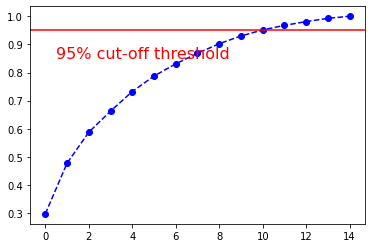

Feature reduced from 15 to 11


In [ ]:
result = normalization_and_PCA(QDV_CultureAndLeisure22,True)

In [ ]:
QDV_CultureAndLeisure22_Preprocessed = pd.DataFrame.from_records(result)
QDV_CultureAndLeisure22_Preprocessed.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_CultureAndLeisure22_Preprocessed.csv')

In [ ]:
compute_hopkins_statistic(result)

0.6825404455249569


###Business and Work

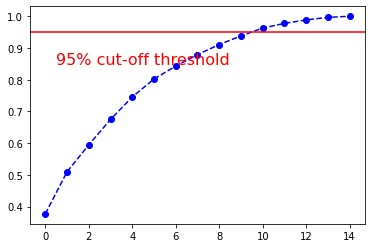

Feature reduced from 15 to 11


In [ ]:
result = normalization_and_PCA(QDV_BusinessAndWork22,True)

In [ ]:
QDV_BusinessAndWork22_Preprocessed = pd.DataFrame.from_records(result)
QDV_BusinessAndWork22_Preprocessed.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_BusinessAndWork22_Preprocessed.csv')

In [ ]:
compute_hopkins_statistic(result)

0.7046017768996643


###Demography and Society

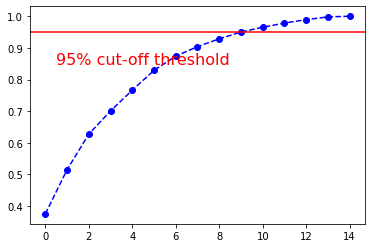

Feature reduced from 15 to 10


In [ ]:
result = normalization_and_PCA(QDV_DemographyAndSociety22,True)

In [ ]:
QDV_DemographyAndSociety22_Preprocessed = pd.DataFrame.from_records(result)
QDV_DemographyAndSociety22_Preprocessed.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_DemographyAndSociety22_Preprocessed.csv')

In [ ]:
compute_hopkins_statistic(result)

0.6975843788301354


###Environment and Services

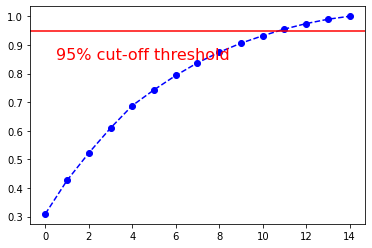

Feature reduced from 15 to 12


In [ ]:
result = normalization_and_PCA(QDV_EnvironmentAndServices22,True)

In [ ]:
QDV_EnvironmentAndServices22_Preprocessed = pd.DataFrame.from_records(result)
QDV_EnvironmentAndServices22_Preprocessed.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_EnvironmentAndServices22_Preprocessed.csv')

In [ ]:
compute_hopkins_statistic(result)

0.6904719601587331


###Justice and Security

In [ ]:
result = normalization_and_PCA(QDV_JusticeAndSecurity22,False)

Feature reduced from 15 to 11


In [ ]:
QDV_JusticeAndSecurity22_Preprocessed = pd.DataFrame.from_records(result)
QDV_JusticeAndSecurity22_Preprocessed.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_JusticeAndSecurity22_Preprocessed.csv')

In [ ]:
compute_hopkins_statistic(result)

0.7042931288944186


###Wealth and Consumption

In [ ]:
result = normalization_and_PCA(QDV_WealthAndConsumption22,False)

Feature reduced from 15 to 9


In [ ]:
QDV_WealthAndConsumption22_Preprocessed = pd.DataFrame.from_records(result)
QDV_WealthAndConsumption22_Preprocessed.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_WealthAndConsumption22_Preprocessed.csv')

In [ ]:
compute_hopkins_statistic(result)

0.6934206987654277


## Write preprocessed File

 ### Business an Work

In [ ]:
baw20 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_BusinessAndWork20.csv')
baw20 = normalization_and_PCA(baw20,False)
baw20 = pd.DataFrame.from_records(baw20)
baw20.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_BusinessAndWork20_Preprocessed.csv')

baw21 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_BusinessAndWork21.csv')
baw21 = normalization_and_PCA(baw21,False)
baw21 = pd.DataFrame.from_records(baw21)
baw21.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_BusinessAndWork21_Preprocessed.csv')

baw22 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_BusinessAndWork22.csv')
baw22 = normalization_and_PCA(baw22,False)
baw22 = pd.DataFrame.from_records(baw22)
baw22.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_BusinessAndWork22_Preprocessed.csv')


Feature reduced from 15 to 11
Feature reduced from 15 to 11


"\nbaw22 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_BusinessAndWork22.csv')\nbaw22 = normalization_and_PCA(baw22,False)\nbaw22 = pd.DataFrame.from_records(baw22)\nbaw22.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_BusinessAndWork22_Preprocessed.csv')\n"

### Culture and Leisure

In [ ]:
cal20 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_CultureAndLeisure20.csv')
cal20 = normalization_and_PCA(cal20,False)
cal20 = pd.DataFrame.from_records(cal20)
cal20.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_CultureAndLeisure20_Preprocessed.csv')

cal21 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_CultureAndLeisure21.csv')
cal21 = normalization_and_PCA(cal21,False)
cal21 = pd.DataFrame.from_records(cal21)
cal21.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_CultureAndLeisure21_Preprocessed.csv')

cal22 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_CultureAndLeisure22.csv')
cal22 = normalization_and_PCA(cal22,False)
cal22 = pd.DataFrame.from_records(cal22)
cal22.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_CultureAndLeisure22_Preprocessed.csv')

Feature reduced from 15 to 12
Feature reduced from 15 to 12
Feature reduced from 15 to 11


### Justice and Security

In [ ]:
jas20 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_JusticeAndSecurity20.csv')
jas20 = normalization_and_PCA(jas20,False)
jas20 = pd.DataFrame.from_records(jas20)
jas20.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_JusticeAndSecurity20_Preprocessed.csv')


jas21 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_JusticeAndSecurity21.csv')
jas21 = normalization_and_PCA(jas21,False)
jas21 = pd.DataFrame.from_records(jas21)
jas21.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_JusticeAndSecurity21_Preprocessed.csv')

jas22 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_JusticeAndSecurity22.csv')
jas22 = normalization_and_PCA(jas22,False)
jas22 = pd.DataFrame.from_records(jas22)
jas22.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_JusticeAndSecurity22_Preprocessed.csv')

Feature reduced from 15 to 11
Feature reduced from 15 to 12
Feature reduced from 15 to 11


### Wealth and Consumption

In [ ]:
wac20 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_WealthAndConsumption20.csv')
wac20 = normalization_and_PCA(wac20,False)
wac20 = pd.DataFrame.from_records(wac20)
wac20.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_WealthAndConsumption20_Preprocessed.csv')


wac21 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_WealthAndConsumption21.csv')
wac21 = normalization_and_PCA(wac21,False)
wac21 = pd.DataFrame.from_records(wac21)
wac21.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_WealthAndConsumption21_Preprocessed.csv')


wac22 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_WealthAndConsumption22.csv')
wac22 = normalization_and_PCA(wac22,False)
wac22 = pd.DataFrame.from_records(wac22)
wac22.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_WealthAndConsumption22_Preprocessed.csv')


Feature reduced from 15 to 9
Feature reduced from 15 to 8
Feature reduced from 15 to 9


### Demography and Society

In [ ]:
das20 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_DemographyAndSociety20.csv')
das20 = normalization_and_PCA(das20,False)
das20 = pd.DataFrame.from_records(das20)
das20.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_DemographyAndSociety20_Preprocessed.csv')


das21 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_DemographyAndSociety21.csv')
das21 = normalization_and_PCA(das21,False)
das21 = pd.DataFrame.from_records(das21)
das21.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_DemographyAndSociety21_Preprocessed.csv')


das22 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_DemographyAndSociety22.csv')
das22 = normalization_and_PCA(das22,False)
das22 = pd.DataFrame.from_records(das22)
das22.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_DemographyAndSociety22_Preprocessed.csv')

Feature reduced from 15 to 11
Feature reduced from 15 to 11
Feature reduced from 15 to 10


### Environment and Services

In [ ]:
eas20 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_EnvironmentAndServices20.csv')
eas20 = normalization_and_PCA(eas20,False)
eas20 = pd.DataFrame.from_records(eas20)
eas20.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2020/QDV_EnvironmentAndServices20_Preprocessed.csv')

eas21 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_EnvironmentAndServices21.csv')
eas21 = normalization_and_PCA(eas21,False)
eas21 = pd.DataFrame.from_records(eas21)
eas21.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2021/QDV_EnvironmentAndServices21_Preprocessed.csv')

eas22 = pd.read_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_EnvironmentAndServices22.csv')
eas22 = normalization_and_PCA(eas22,False)
eas22 = pd.DataFrame.from_records(eas22)
eas22.to_csv('/content/gdrive/MyDrive/QDV-Clustering/QDV2022/QDV_EnvironmentAndServices22_Preprocessed.csv')

Feature reduced from 15 to 12
Feature reduced from 15 to 12
Feature reduced from 15 to 12
